In [1]:
#Library Used in all Code
import numpy as np
import pandas as pd

#Used In Rule of Mixtures
import pymatgen as pymat
import mendeleev as mendel

#Random
np.random.seed(44) # Random Seed1
import random

# PLOTTING (MATPLOTLIB)
%matplotlib inline
import matplotlib.animation as animation
from IPython.display import HTML

# PLOTTING (PLOTLY)
import plotly 
import plotly.graph_objs as go
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)

# ML
from lolopy.learners import RandomForestRegressor

# Meltheas TOOL
from simtool import findInstalledSimToolNotebooks, searchForSimTool
from simtool import getSimToolInputs, getSimToolOutputs, Run

MeltHEA = searchForSimTool('meltheas')
from IPython.display import clear_output
from IPython.display import display
from hublib.ui import FileUpload
import ipywidgets as widgets
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

<IPython.core.display.Javascript object>

# Import Initial Dataset 

In [2]:
#Get initial set for testing data
initial_data = pd.read_csv('NewSmallCompistionDataSet.csv')
initial_data = initial_data.drop(['Solid Tm'], axis=1)
initial_data = initial_data.drop(['Liquid Tm'], axis=1)
initial_data = initial_data.drop(['Minus'], axis=1)
initial_data = initial_data.drop(['Plus'], axis=1)
initial_data = initial_data.drop(['Unnamed: 0'], axis=1)
compared_df = initial_data.drop(['Simulated Tm'], axis=1)
#display(initial_data)

# All Plausible Compisition Creator

In [3]:
#Create lines to get values with .1 step size
nx = 11
x1 = np.linspace(0, 1, nx)
y, y1, y2, y3, y4 = np.meshgrid(x1, x1, x1, x1, x1)
positions = np.vstack([y.ravel(), y1.ravel(), y2.ravel(), y3.ravel(), y4.ravel()]).T

#Make dataframe with limits of all possible compistions combinations
all_permutations = pd.DataFrame(positions)
all_permutations["sum"]= all_permutations.sum(axis = 1)
plausible_compositions = all_permutations[all_permutations["sum"] == 1]

plausible_compositions = plausible_compositions[plausible_compositions[0] <= 0.5]
plausible_compositions = plausible_compositions[plausible_compositions[1] <= 0.5]
plausible_compositions = plausible_compositions[plausible_compositions[2] <= 0.5]
plausible_compositions = plausible_compositions[plausible_compositions[3] <= 0.5]
plausible_compositions = plausible_compositions[plausible_compositions[4] <= 0.5]

plausible_compositions = plausible_compositions.round(1)

plausible_compositions = plausible_compositions.drop(["sum"], axis = 1)
initial_plausible_compositions = plausible_compositions
#display(plausible_compositions)

# Apply Rule of Mixtures to Compositions

In [4]:
#string to select characteristics
actual_qued_values = ['youngs_modulus', 'atomic_radius', 'electrical_resistivity','CTE','hardness','boiling_point',
                         'atomic_mass','poissons_ratio','density_of_solid','en_gosh','melting_point']

sample = ['Cr', 'Co', 'Cu', 'Fe', 'Ni']

def get_discriptors(input_string,sample):
    #dictionary values to choose from
    string_dict = ['bulk_modulus','youngs_modulus','CTE','thermal_conductivity','boiling_point','critical_temperature',
                  'vdw_radius','average_ionic_radius','atomic_radius','atomic_number','atomic_mass','molar_volume', 
                   'density_of_solid','hardness','poissons_ratio','period','group','en_gosh','electrical_resistivity', 'melting_point']

    #Creation of dictionary
    data_set = {}

    #Make dict of lists
    for length_string in range(len(string_dict)):
        data_set[string_dict[length_string]] = []

    #all plausbile compositions from before
    df2 = plausible_compositions

    #list of all things
    que_values = []

    for item in sample:
        element_object = pymat.Element(item)
        data_set[string_dict[0]].append(element_object.bulk_modulus) #bulk_modulus
        data_set[string_dict[1]].append(element_object.youngs_modulus) #youngs_modulus
        data_set[string_dict[2]].append(element_object.coefficient_of_linear_thermal_expansion) #CTE
        data_set[string_dict[3]].append(element_object.thermal_conductivity) #thermal conductivity
        data_set[string_dict[4]].append(element_object.boiling_point) #boiling_point
        data_set[string_dict[5]].append(element_object.critical_temperature) #critical temperature
        data_set[string_dict[6]].append(element_object.van_der_waals_radius) #vander wall radius
        data_set[string_dict[7]].append(element_object.average_ionic_radius) #average ionic radius
        data_set[string_dict[8]].append(element_object.atomic_radius) #atomic radius
        data_set[string_dict[9]].append(element_object.Z) #atomic number
        data_set[string_dict[10]].append(element_object.atomic_mass) #atomic mass
        data_set[string_dict[11]].append(element_object.molar_volume) #molar volume
        data_set[string_dict[12]].append(element_object.density_of_solid) #density_solid
        data_set[string_dict[13]].append(element_object.brinell_hardness) #brinell_hardness
        data_set[string_dict[14]].append(element_object.poissons_ratio) #poissons_ratio
        data_set[string_dict[15]].append(element_object.row) #period
        data_set[string_dict[16]].append(element_object.group) #group
        data_set[string_dict[17]].append(element_object.X) #en_gosh
        data_set[string_dict[18]].append(element_object.electrical_resistivity) #electrical_resistivity
        data_set[string_dict[19]].append(element_object.melting_point) #melting_point

    for discript in input_string:
        que_values.append(data_set[discript])

    df = pd.DataFrame(data = que_values, columns = sample, index = input_string) 
    display(df)
    return df

discriptors_df = get_discriptors(actual_qued_values,sample)

Cr            Co            Cu  \
youngs_modulus          2.790000e+02  2.090000e+02  1.300000e+02   
atomic_radius           1.400000e+00  1.350000e+00  1.350000e+00   
electrical_resistivity  1.270000e-07  6.000000e-08  1.720000e-08   
CTE                     4.900000e-06  1.300000e-05  1.650000e-05   
hardness                1.120000e+03  7.000000e+02  8.740000e+02   
boiling_point           2.944000e+03  3.200000e+03  3.200000e+03   
atomic_mass             5.199610e+01  5.893319e+01  6.354600e+01   
poissons_ratio          2.100000e-01  3.100000e-01  3.400000e-01   
density_of_solid        7.140000e+03  8.900000e+03  8.920000e+03   
en_gosh                 1.660000e+00  1.880000e+00  1.900000e+00   
melting_point           2.180000e+03  1.768000e+03  1.357770e+03   

                                  Fe            Ni  
youngs_modulus          2.110000e+02  2.000000e+02  
atomic_radius           1.400000e+00  1.350000e+00  
electrical_resistivity  1.000000e-07  7.200000e-08  
CTE                     1.180000e-05  1.340000e-05  
hardness                4.900000e+02  7.000000e+02  
boiling_point           3.134000e+03  3.186000e+03  
atomic_mass             5.584500e+01  5.869340e+01  
poissons_ratio          2.900000e-01  3.100000e-01  
density_of_solid        7.874000e+03  8.908000e+03  
en_gosh                 1.830000e+00  1.910000e+00  
melting_point           1.811000e+03  1.728000e+03

In [5]:
#Rename df to match other dataframes
plausible_compositions = plausible_compositions.rename(columns = {0:'Cr',1:'Co',2:'Cu',3:'Fe', 4:'Ni'})

#Taking out replicas
df = pd.merge(plausible_compositions, compared_df, how='left', indicator = 'Exsist')
df = df[df['Exsist'] != 'both']
plausible_compositions = df.drop(['Exsist'], axis = 1)

#display(plausible_compositions)

# Applying Rule of Mixture

In [6]:
#Applu Rule of Mixtures
def rule_mixtures(df2,df,sample): 
    #Creator column of first rule mixture discriptor to concat to
    cr = 0
    for comps in sample:
        cr = cr+df2[comps]*df[comps][0]
    cr = cr.to_frame()

    #Concat rest of compistions with rule of mixtures applied
    for x in range(1,len(actual_qued_values)):
        cf = 0
        for comps in sample:
            cf = cf + df2[comps]*df[comps][x]
        cf.to_frame()
        cr = pd.concat([cr,cf], axis=1)

    #Renames columns to discriptors
    cr.columns = actual_qued_values
    return cr

plausible_compositions_rule_mixtures = rule_mixtures(plausible_compositions,discriptors_df,sample)
known_compositions_rule_mixtures = rule_mixtures(compared_df,discriptors_df,sample)
#display(plausible_compositions_rule_mixtures)

# Data Preperation

In [7]:
#Concatinate values
all_rule_mixtures = pd.concat([known_compositions_rule_mixtures,plausible_compositions_rule_mixtures])
all_compositions = pd.concat([compared_df,plausible_compositions])

#Experimental melting temperatures [K]
T_m_Cr = 2180
T_m_Co = 1768
T_m_Cu = 1358
T_m_Fe = 1811
T_m_Ni = 1728

#display(all_compositions)

In [8]:
#Set testing and training data
all_values = all_rule_mixtures.values.tolist()
all_labels = initial_data['Simulated Tm'].tolist()

# List of lists are turned into Numpy arrays to facilitate calculations in steps to follow (Normalization).
all_values = np.array(all_values, dtype = float)
all_labels = np.array(all_labels, dtype = float)

create_label = np.zeros((plausible_compositions_rule_mixtures.shape[0],), dtype = int)
all_labels = np.concatenate((all_labels,create_label), axis = 0)
#display(all_compositions)

# Getting CSVS for Sequential Learning

In [9]:
import glob
import os
import os.path, time

list_seq_learn = []

#path = '/home/nanohub/dfarache/Random_Active_Learn/Untitled Folder/'
path = os.getcwd()

print(path)

list_of_files = sorted(os.listdir(path), key=os.path.getctime)
for docs in list_of_files:
    if 'melting_8labels' in docs:
        list_seq_learn.append(docs)
print(list_seq_learn)

/home/nanohub/dfarache/Random_Active_Learn/Untitled Folder/200picoRuns_RandomSeeds/MLI_datasetCreatorForPaper
['MLI_melting_8labels50pico0.csv', 'MLI_melting_8labels50pico1.csv', 'MLI_melting_8labels50pico2.csv', 'MLI_melting_8labels50pico3.csv', 'MLI_melting_8labels200pico4.csv', 'MLI_melting_8labels200pico5.csv']


# Random Forest Creation and Prediction

In [10]:
X = all_values.copy() #discriptors
y = all_labels.copy() #all labels  

# assign values
model = RandomForestRegressor(num_trees = 350) #model if iterate through
#print(model.__init__)

entry_number_init = initial_data.shape[0] #starting point of initial data
in_train = np.zeros(len(X), dtype=np.bool) #make all false

in_train[:entry_number_init] = True #turns false to true 

#in_train[np.where(y!=0)] = True

print('Picked {} training entries'.format(in_train.sum()))

nsamples = in_train.sum()
train_fraction = 0.8
train_idx = int(train_fraction*nsamples)

print (X.shape, y.shape)


#Get previous runs of sequential and use them
if list_seq_learn:
    y_counter = 0
    seq_learn_data = pd.read_csv(list_seq_learn[-1])
    for val in seq_learn_data['Index']:
        in_train[val] = True
        y[val] = seq_learn_data['Simulated Tm'][y_counter]
        y_counter = y_counter + 1
    
    

# Uncomment the line below to shuffle the dataset (we do not do this here to ensure consistent results for every run)
#order = np.argsort(np.random.random(all_labels.shape)) # This numpy argsort returns the indexes that would be used to shuffle a list
#order = np.arange(nsamples)
#all_values = all_values[0:nsamples][order]
#all_labels = all_labels[0:nsamples][order]

model.fit(X[:train_idx, :], y[:train_idx])
test_pred, test_std = model.predict(X[train_idx:nsamples, :], return_std=True)
pred, std = model.predict(X, return_std=True)
#print(in_train)

Picked 39 training entries
(593, 11) (593,)


In [11]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

layout0= go.Layout(title= "Melting Temperature", hovermode= 'closest',
    xaxis= dict(title= 'Real Values',zeroline= False, gridwidth= 2),
    yaxis= dict(title= 'Predictions',zeroline= False, gridwidth= 2), height=800, width=800, font=dict(size=22))

testing= go.Scatter(x = y[train_idx:nsamples], y = test_pred, mode = 'markers', marker= dict(size= 14, color= 'red', symbol = 'x'), 
                    name= "Testing Data", error_y=dict(type='data', array=test_std,visible=True))
everything = go.Scatter(x = y[:nsamples], y = pred, mode = 'markers', marker= dict(size= 14, color= 'blue', symbol = 'x'), 
                        name= "All Data", error_y=dict(type='data', array=std,visible=True))
match = go.Scatter(x = [1700,2300], y = [1700,2300], mode = 'lines', name = "Match", line= dict( color = 'black', dash='dash'))

traces = [everything,testing,match]
fig= go.Figure(traces, layout=layout0)
fig.update_yaxes(automargin=True)
iplot(fig)
#print(model.__dict__)

# Applying Acquisition Function

70
-------------------------------------------------------------
Experiment #  0
546
[0.0, 0.5, 0.0, 0.3, 0.2]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/c6d389d5c8aa46feb770c73b0363690f/inputs.yaml
       RUNS/c6d389d5c8aa46feb770c73b0363690f
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/c6d389d5c8aa46feb770c73b0363690f/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:36<00:00, 183.86s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/c6d389d5c8aa46feb770c73b0363690f/inputs.yaml
       RUNS/c6d389d5c8aa46feb770c73b0363690f
Predicted melting temperature for this potential:  2553.3456619225967
95% confidence interval:  1.663109463390095
Fraction of system solid:  0.00043402777777777775
Fraction of system liquid:  0.9893663194444444
Simulation Success Flag 0.0
Crystal Structure Info:  [2.000e+00 1.500e+01 3.000e+00 2.700e+01 2.000e+00 4.559e+03 4.608e+03]


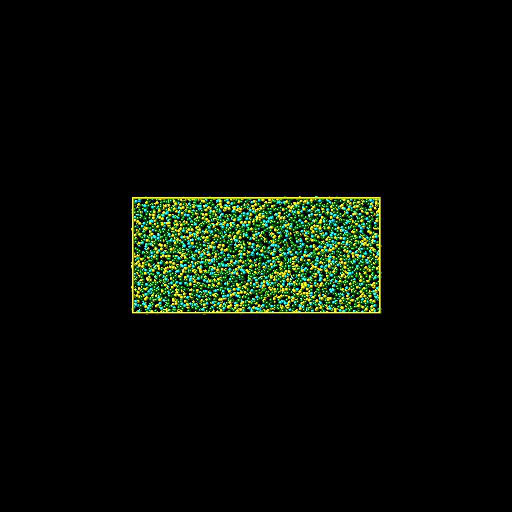

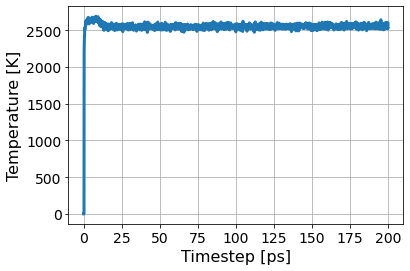

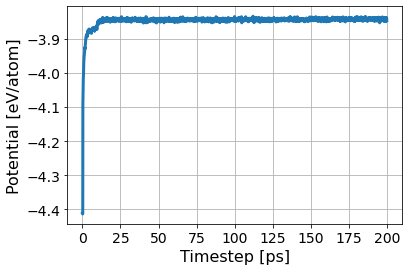

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/697f452f87d64c0fab0f727c421f969f/inputs.yaml
       RUNS/697f452f87d64c0fab0f727c421f969f
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/697f452f87d64c0fab0f727c421f969f/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:11<00:00, 182.86s/cell]  


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/697f452f87d64c0fab0f727c421f969f/inputs.yaml
       RUNS/697f452f87d64c0fab0f727c421f969f
Predicted melting temperature for this potential:  2350.372238327091
95% confidence interval:  1.5065708984441266
Fraction of system solid:  0.0010850694444444445
Fraction of system liquid:  0.9876302083333334
Simulation Success Flag 0.0
Crystal Structure Info:  [5.000e+00 3.000e+01 1.000e+00 2.100e+01 0.000e+00 4.551e+03 4.608e+03]


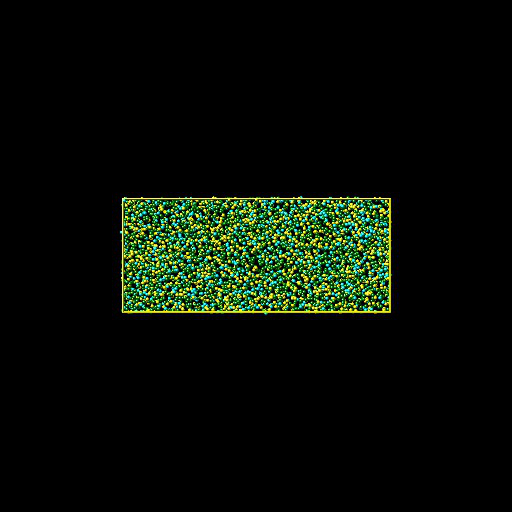

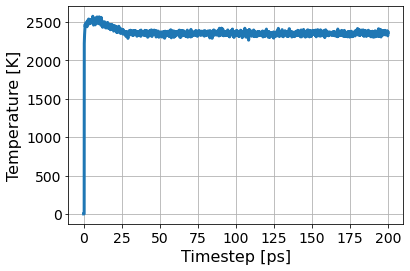

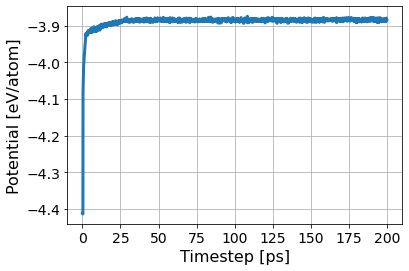

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/283e96ff7f394f0899ef6a897489699f/inputs.yaml
       RUNS/283e96ff7f394f0899ef6a897489699f
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/283e96ff7f394f0899ef6a897489699f/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:15:50<00:00, 182.02s/cell]  


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/283e96ff7f394f0899ef6a897489699f/inputs.yaml
       RUNS/283e96ff7f394f0899ef6a897489699f
Predicted melting temperature for this potential:  2369.953333458177
95% confidence interval:  2.013638848056769
Fraction of system solid:  0.020399305555555556
Fraction of system liquid:  0.7078993055555556
Simulation Success Flag 0.0
Crystal Structure Info:  [  94.  231. 1005.   16.    0. 3262. 4608.]


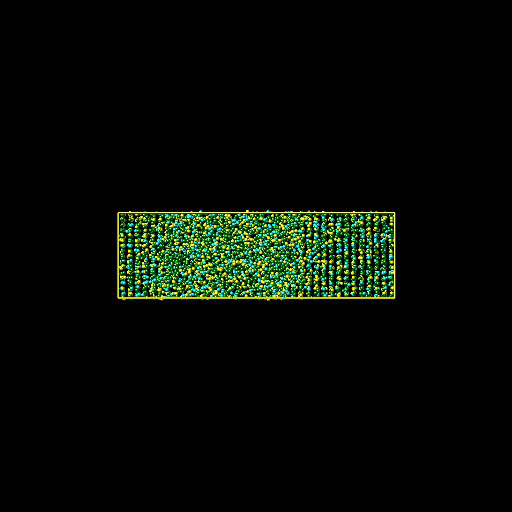

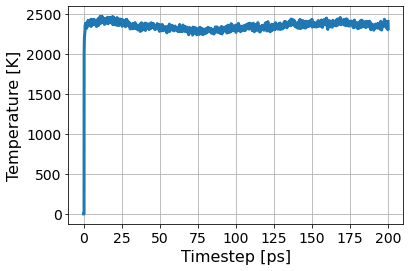

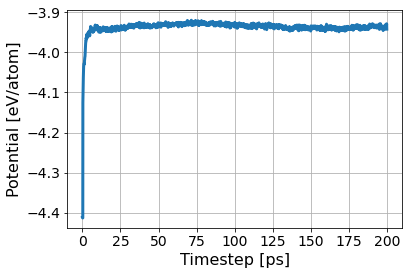

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/d4e915c61572461284b11f5ef33cf070/inputs.yaml
       RUNS/d4e915c61572461284b11f5ef33cf070
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/d4e915c61572461284b11f5ef33cf070/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:17<00:00, 183.09s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/d4e915c61572461284b11f5ef33cf070/inputs.yaml
       RUNS/d4e915c61572461284b11f5ef33cf070
Predicted melting temperature for this potential:  2355.870329088639
95% confidence interval:  2.0475225126674235
Fraction of system solid:  0.4735243055555556
Fraction of system liquid:  0.5071614583333334
Simulation Success Flag 1.0
Crystal Structure Info:  [2182.   49.   32.    8.    0. 2337. 4608.]


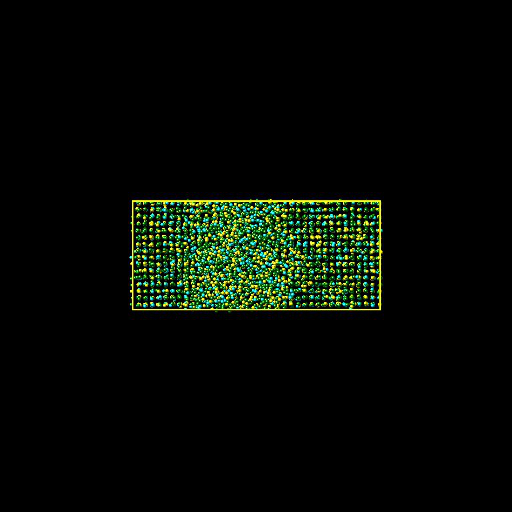

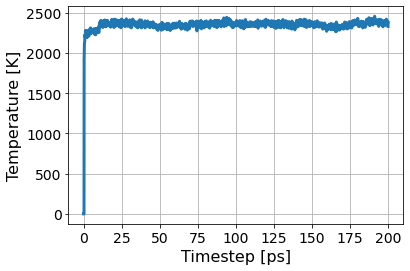

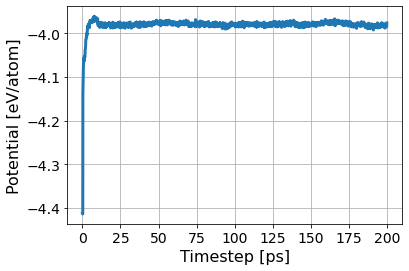

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  1
202
[0.0, 0.1, 0.5, 0.4, 0.0]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/c0411b8a564d4cbd81b08f87a683836e/inputs.yaml
       RUNS/c0411b8a564d4cbd81b08f87a683836e
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/c0411b8a564d4cbd81b08f87a683836e/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:11:11<00:00, 170.84s/cell]  


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/c0411b8a564d4cbd81b08f87a683836e/inputs.yaml
       RUNS/c0411b8a564d4cbd81b08f87a683836e
Predicted melting temperature for this potential:  2337.0534290886394
95% confidence interval:  1.5117682535610546
Fraction of system solid:  0.00043402777777777775
Fraction of system liquid:  0.9934895833333334
Simulation Success Flag 0.0
Crystal Structure Info:  [2.000e+00 1.200e+01 0.000e+00 1.400e+01 2.000e+00 4.578e+03 4.608e+03]


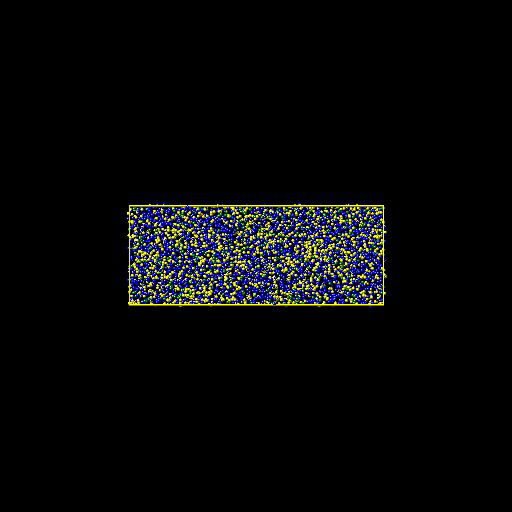

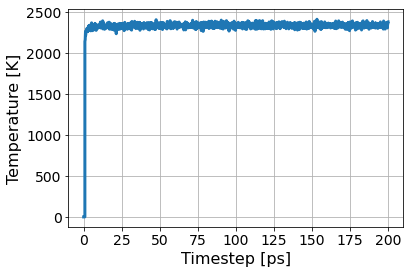

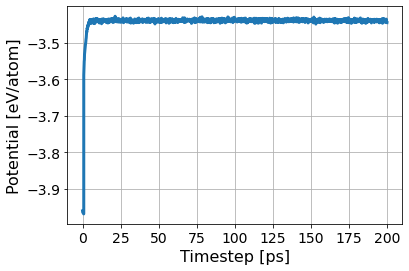

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/3fdbc2586f774514b19d279d3a0531dd/inputs.yaml
       RUNS/3fdbc2586f774514b19d279d3a0531dd
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/3fdbc2586f774514b19d279d3a0531dd/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:11:41<00:00, 172.08s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/3fdbc2586f774514b19d279d3a0531dd/inputs.yaml
       RUNS/3fdbc2586f774514b19d279d3a0531dd
Predicted melting temperature for this potential:  2204.002866167291
95% confidence interval:  1.4841668463666882
Fraction of system solid:  0.00021701388888888888
Fraction of system liquid:  0.9937065972222222
Simulation Success Flag 0.0
Crystal Structure Info:  [1.000e+00 1.400e+01 0.000e+00 1.100e+01 3.000e+00 4.579e+03 4.608e+03]


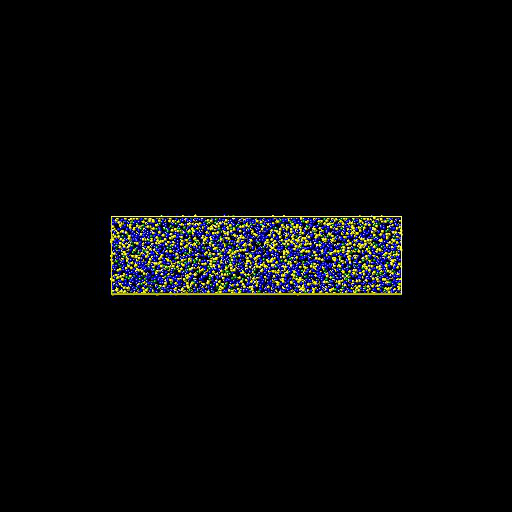

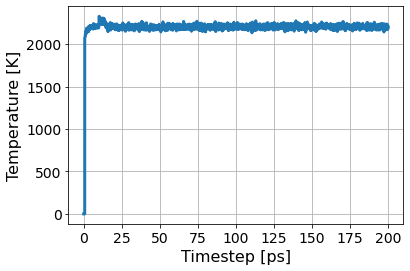

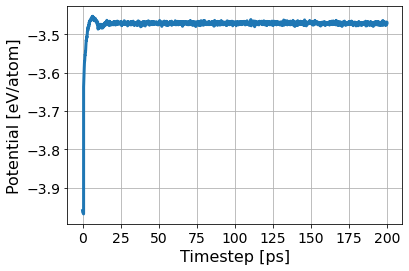

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/749aba5797fa438b87ed1484320f89f5/inputs.yaml
       RUNS/749aba5797fa438b87ed1484320f89f5
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/749aba5797fa438b87ed1484320f89f5/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:12:24<00:00, 173.76s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/749aba5797fa438b87ed1484320f89f5/inputs.yaml
       RUNS/749aba5797fa438b87ed1484320f89f5
Predicted melting temperature for this potential:  2076.0514872659173
95% confidence interval:  1.371500549628582
Fraction of system solid:  0.0006510416666666666
Fraction of system liquid:  0.9913194444444444
Simulation Success Flag 0.0
Crystal Structure Info:  [3.000e+00 1.900e+01 2.000e+00 1.500e+01 1.000e+00 4.568e+03 4.608e+03]


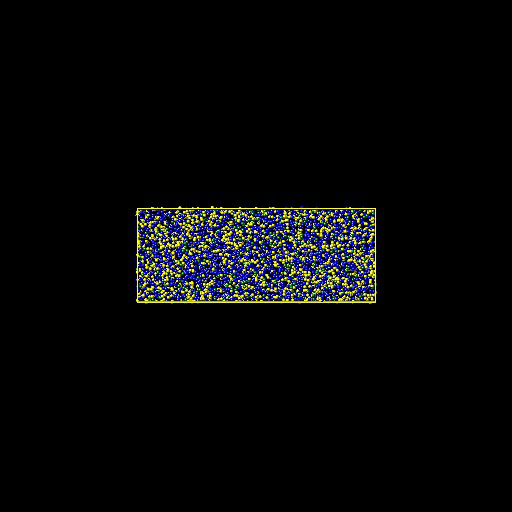

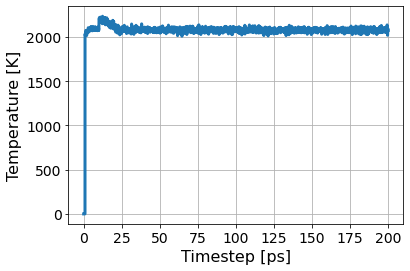

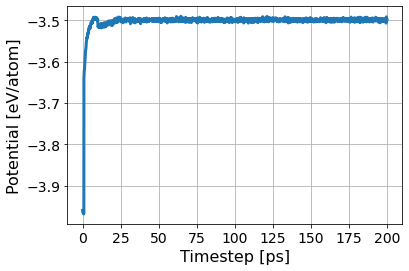

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/5cd1fe976bf8421aa80392e2564bd854/inputs.yaml
       RUNS/5cd1fe976bf8421aa80392e2564bd854
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/5cd1fe976bf8421aa80392e2564bd854/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:13:03<00:00, 175.32s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/5cd1fe976bf8421aa80392e2564bd854/inputs.yaml
       RUNS/5cd1fe976bf8421aa80392e2564bd854
Predicted melting temperature for this potential:  1894.3282153558052
95% confidence interval:  1.2551882585146978
Fraction of system solid:  0.0015190972222222222
Fraction of system liquid:  0.9861111111111112
Simulation Success Flag 0.0
Crystal Structure Info:  [7.000e+00 3.600e+01 2.000e+00 1.900e+01 0.000e+00 4.544e+03 4.608e+03]


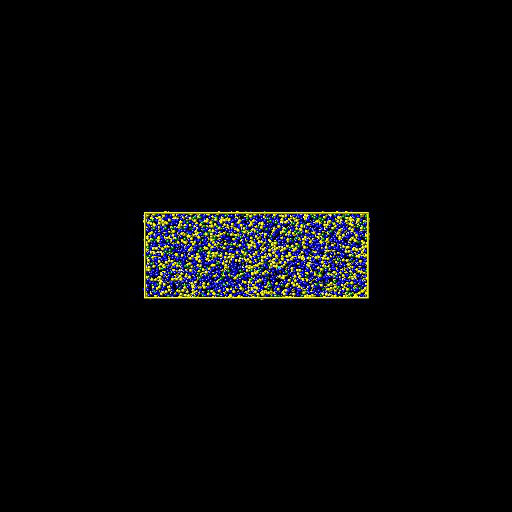

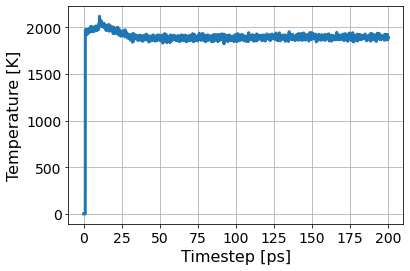

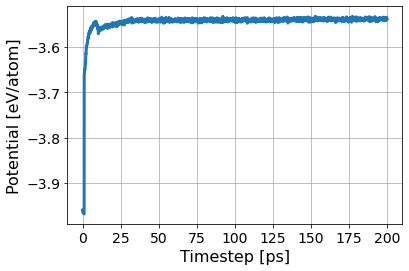

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/a62d03a8982b47e6a1a0c39f6a723529/inputs.yaml
       RUNS/a62d03a8982b47e6a1a0c39f6a723529
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/a62d03a8982b47e6a1a0c39f6a723529/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:13:08<00:00, 175.55s/cell]  


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/a62d03a8982b47e6a1a0c39f6a723529/inputs.yaml
       RUNS/a62d03a8982b47e6a1a0c39f6a723529
Predicted melting temperature for this potential:  1962.423177777778
95% confidence interval:  1.4352517926062631
Fraction of system solid:  0.3993055555555556
Fraction of system liquid:  0.5891927083333334
Simulation Success Flag 1.0
Crystal Structure Info:  [1.840e+03 3.700e+01 1.200e+01 4.000e+00 0.000e+00 2.715e+03 4.608e+03]


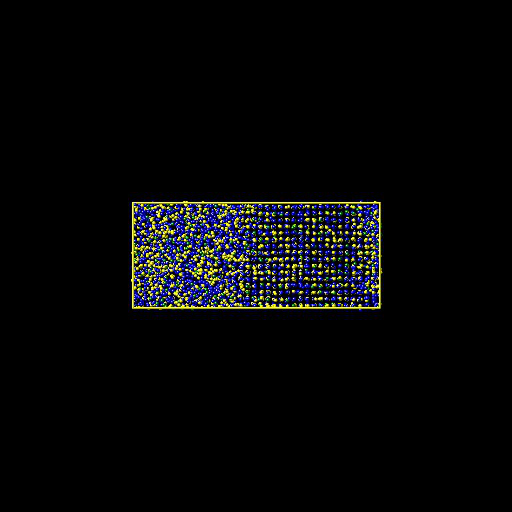

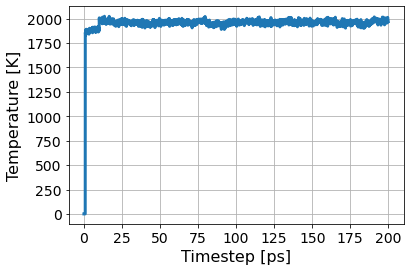

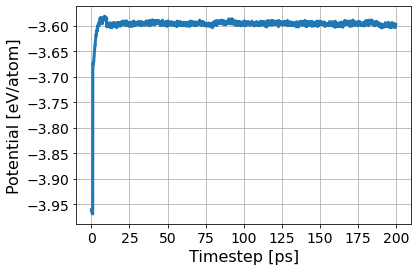

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  2
41
[0.0, 0.0, 0.1, 0.5, 0.4]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/73064360f859470ba22d575436320b56/inputs.yaml
       RUNS/73064360f859470ba22d575436320b56
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/73064360f859470ba22d575436320b56/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:13:44<00:00, 176.97s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/73064360f859470ba22d575436320b56/inputs.yaml
       RUNS/73064360f859470ba22d575436320b56
Predicted melting temperature for this potential:  2682.483234332085
95% confidence interval:  1.8170253796366795
Fraction of system solid:  0.00043402777777777775
Fraction of system liquid:  0.9939236111111112
Simulation Success Flag 0.0
Crystal Structure Info:  [2.000e+00 1.300e+01 0.000e+00 1.300e+01 0.000e+00 4.580e+03 4.608e+03]


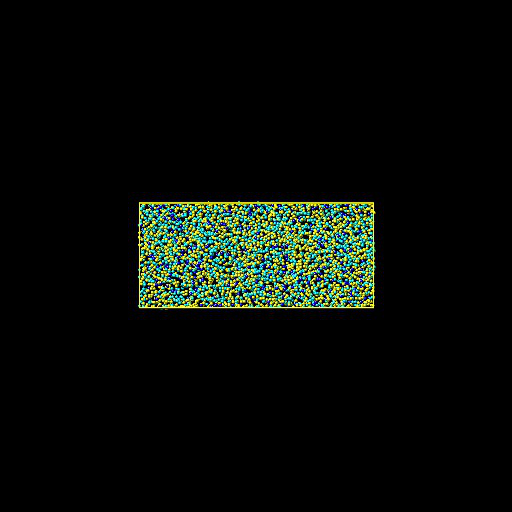

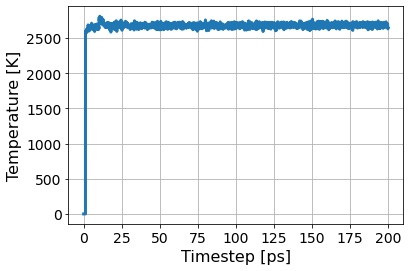

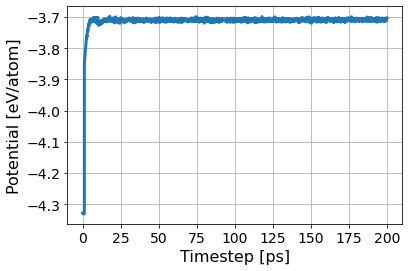

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/077b367bc13a4a8cbbadff74eb343d58/inputs.yaml
       RUNS/077b367bc13a4a8cbbadff74eb343d58
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/077b367bc13a4a8cbbadff74eb343d58/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:14:22<00:00, 178.49s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/077b367bc13a4a8cbbadff74eb343d58/inputs.yaml
       RUNS/077b367bc13a4a8cbbadff74eb343d58
Predicted melting temperature for this potential:  2514.5904679151063
95% confidence interval:  1.6273525232315285
Fraction of system solid:  0.0015190972222222222
Fraction of system liquid:  0.9889322916666666
Simulation Success Flag 0.0
Crystal Structure Info:  [   7.   20.    0.   24.    0. 4557. 4608.]


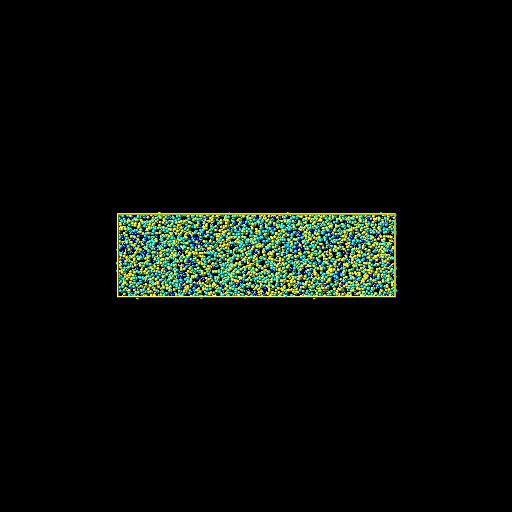

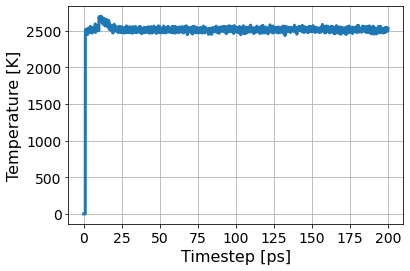

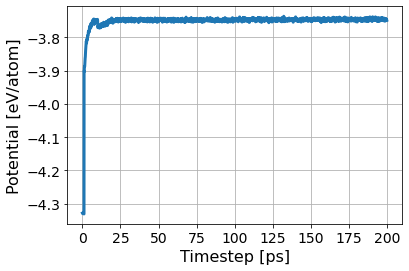

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/d48db8aa74ae463aa65dadcf22ba1fa8/inputs.yaml
       RUNS/d48db8aa74ae463aa65dadcf22ba1fa8
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/d48db8aa74ae463aa65dadcf22ba1fa8/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:14:54<00:00, 179.78s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/d48db8aa74ae463aa65dadcf22ba1fa8/inputs.yaml
       RUNS/d48db8aa74ae463aa65dadcf22ba1fa8
Predicted melting temperature for this potential:  2311.930099250936
95% confidence interval:  1.5482037833007698
Fraction of system solid:  0.0010850694444444445
Fraction of system liquid:  0.9861111111111112
Simulation Success Flag 0.0
Crystal Structure Info:  [5.000e+00 3.100e+01 7.000e+00 2.000e+01 1.000e+00 4.544e+03 4.608e+03]


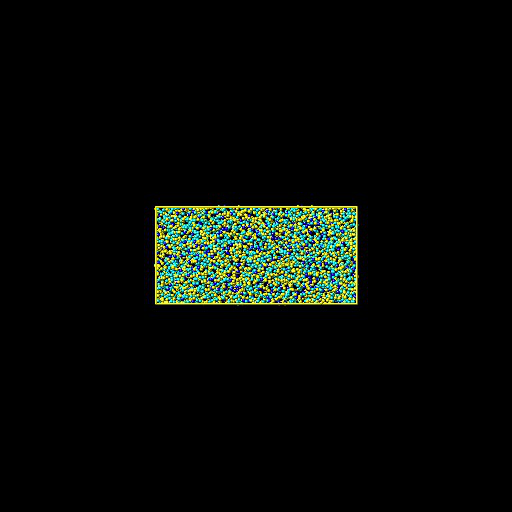

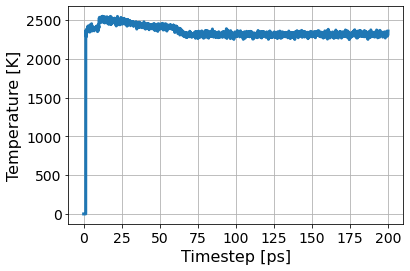

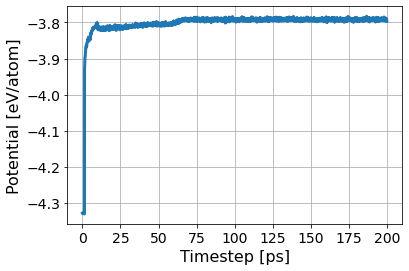

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/ad5a97e06c37476d90c84bbb6af2437f/inputs.yaml
       RUNS/ad5a97e06c37476d90c84bbb6af2437f
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/ad5a97e06c37476d90c84bbb6af2437f/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:15:28<00:00, 181.13s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/ad5a97e06c37476d90c84bbb6af2437f/inputs.yaml
       RUNS/ad5a97e06c37476d90c84bbb6af2437f
Predicted melting temperature for this potential:  2386.706586891386
95% confidence interval:  1.9051581019539356
Fraction of system solid:  0.4826388888888889
Fraction of system liquid:  0.4971788194444444
Simulation Success Flag 1.0
Crystal Structure Info:  [2224.   65.   23.    5.    0. 2291. 4608.]


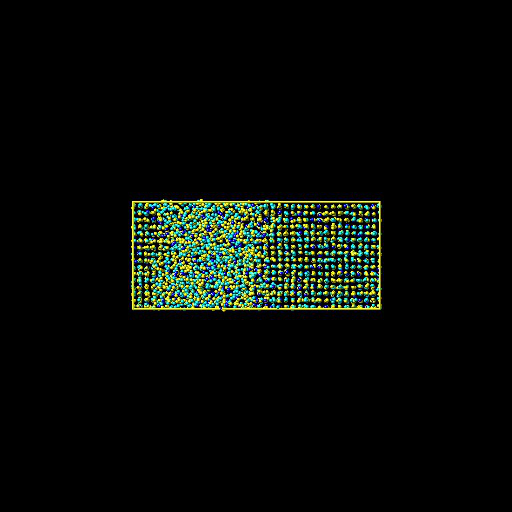

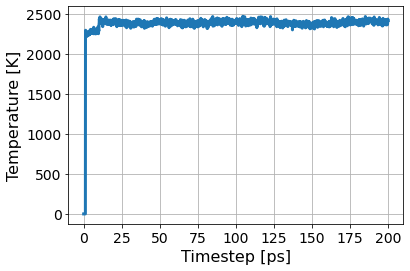

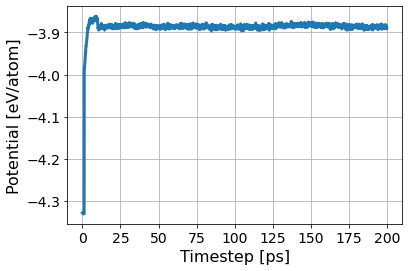

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  3
543
[0.0, 0.5, 0.0, 0.0, 0.5]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/3133dce6e90b491e8d6236aef813b09a/inputs.yaml
       RUNS/3133dce6e90b491e8d6236aef813b09a
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/3133dce6e90b491e8d6236aef813b09a/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:11:49<00:00, 172.37s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/3133dce6e90b491e8d6236aef813b09a/inputs.yaml
       RUNS/3133dce6e90b491e8d6236aef813b09a
Predicted melting temperature for this potential:  2328.278373158552
95% confidence interval:  1.4893590197577233
Fraction of system solid:  0.0010850694444444445
Fraction of system liquid:  0.9930555555555556
Simulation Success Flag 0.0
Crystal Structure Info:  [5.000e+00 1.400e+01 1.000e+00 1.200e+01 0.000e+00 4.576e+03 4.608e+03]


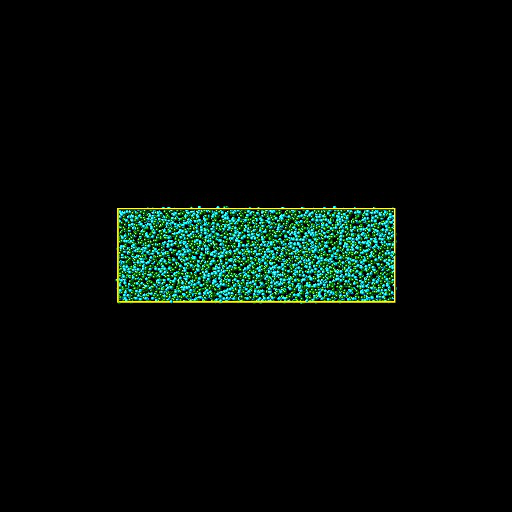

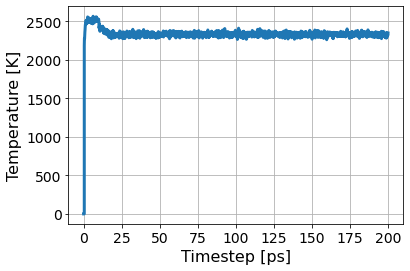

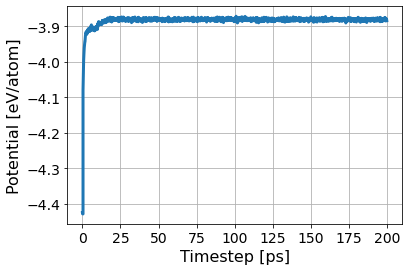

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/3a2ef8127c7e428d958e20843d855a1b/inputs.yaml
       RUNS/3a2ef8127c7e428d958e20843d855a1b
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/3a2ef8127c7e428d958e20843d855a1b/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:12:19<00:00, 173.56s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/3a2ef8127c7e428d958e20843d855a1b/inputs.yaml
       RUNS/3a2ef8127c7e428d958e20843d855a1b
Predicted melting temperature for this potential:  2190.392170162297
95% confidence interval:  1.4186497205189943
Fraction of system solid:  0.0015190972222222222
Fraction of system liquid:  0.9891493055555556
Simulation Success Flag 0.0
Crystal Structure Info:  [7.000e+00 2.200e+01 1.000e+00 2.000e+01 0.000e+00 4.558e+03 4.608e+03]


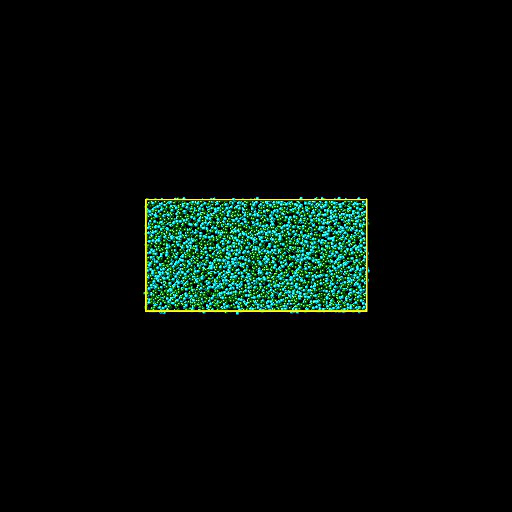

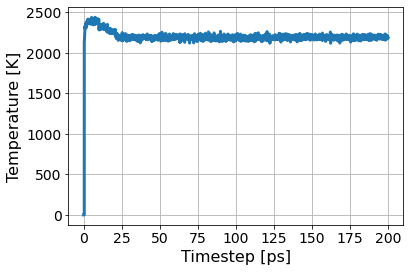

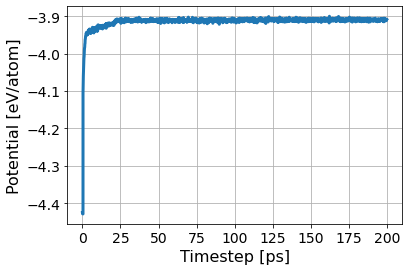

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/7c2f5bc808e641f1b193bfb947586ce6/inputs.yaml
       RUNS/7c2f5bc808e641f1b193bfb947586ce6
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/7c2f5bc808e641f1b193bfb947586ce6/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:13:03<00:00, 175.32s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/7c2f5bc808e641f1b193bfb947586ce6/inputs.yaml
       RUNS/7c2f5bc808e641f1b193bfb947586ce6
Predicted melting temperature for this potential:  2165.541386017478
95% confidence interval:  1.5605600973192353
Fraction of system solid:  0.1469184027777778
Fraction of system liquid:  0.791015625
Simulation Success Flag 0.0
Crystal Structure Info:  [ 677.  247.   21.   18.    0. 3645. 4608.]


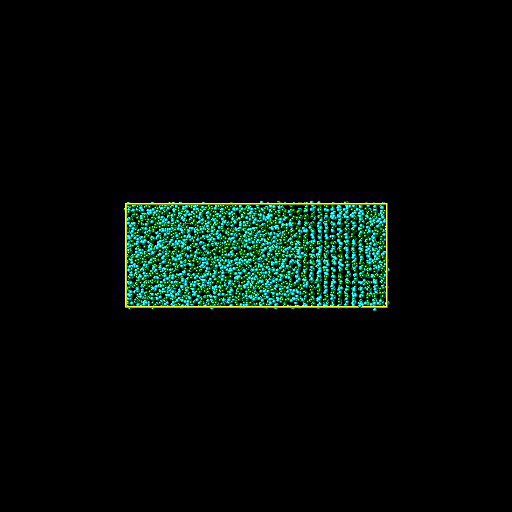

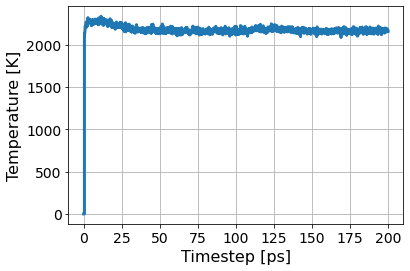

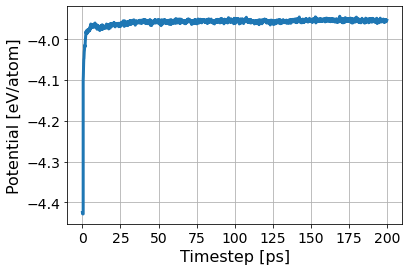

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/edd789c2672a474b957cacbad9206f96/inputs.yaml
       RUNS/edd789c2672a474b957cacbad9206f96
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/edd789c2672a474b957cacbad9206f96/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:13:06<00:00, 175.44s/cell]  


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/edd789c2672a474b957cacbad9206f96/inputs.yaml
       RUNS/edd789c2672a474b957cacbad9206f96
Predicted melting temperature for this potential:  2175.537117602996
95% confidence interval:  1.5981534746888912
Fraction of system solid:  0.4255642361111111
Fraction of system liquid:  0.5562065972222222
Simulation Success Flag 1.0
Crystal Structure Info:  [1961.   44.   33.    7.    0. 2563. 4608.]


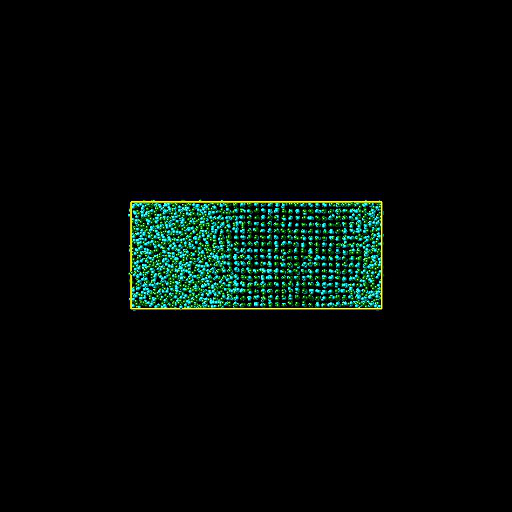

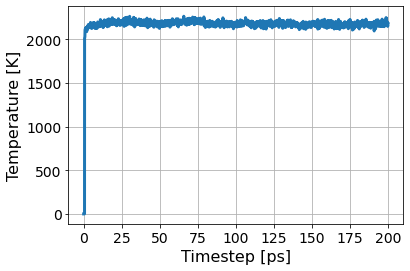

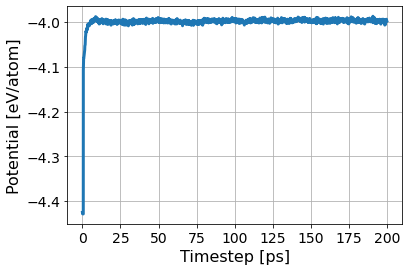

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  4
393
[0.0, 0.3, 0.0, 0.2, 0.5]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/f11e02ddc9f84ce2a394bbe68121af84/inputs.yaml
       RUNS/f11e02ddc9f84ce2a394bbe68121af84
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/f11e02ddc9f84ce2a394bbe68121af84/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:15:28<00:00, 181.13s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/f11e02ddc9f84ce2a394bbe68121af84/inputs.yaml
       RUNS/f11e02ddc9f84ce2a394bbe68121af84
Predicted melting temperature for this potential:  2357.2484218476907
95% confidence interval:  1.6273573453131667
Fraction of system solid:  0.0015190972222222222
Fraction of system liquid:  0.9898003472222222
Simulation Success Flag 0.0
Crystal Structure Info:  [7.000e+00 1.700e+01 3.000e+00 2.000e+01 0.000e+00 4.561e+03 4.608e+03]


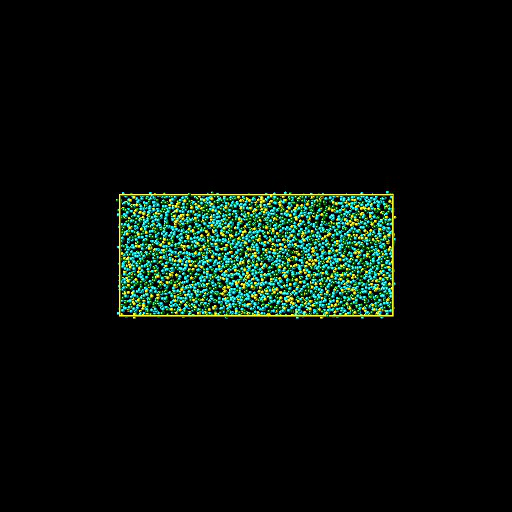

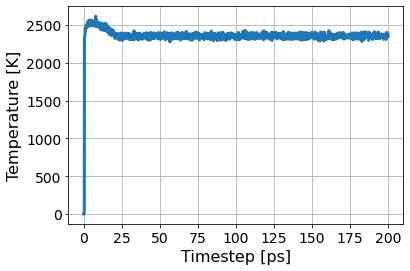

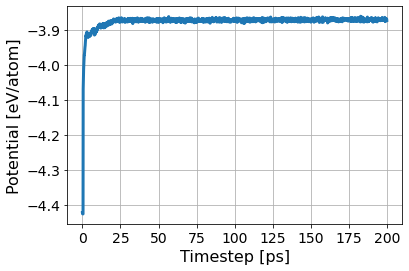

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0081f1c5e70f45c29ac7ea2431dc5b96/inputs.yaml
       RUNS/0081f1c5e70f45c29ac7ea2431dc5b96
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/0081f1c5e70f45c29ac7ea2431dc5b96/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:15:46<00:00, 181.85s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0081f1c5e70f45c29ac7ea2431dc5b96/inputs.yaml
       RUNS/0081f1c5e70f45c29ac7ea2431dc5b96
Predicted melting temperature for this potential:  2201.310572908864
95% confidence interval:  1.4807176058657636
Fraction of system solid:  0.002387152777777778
Fraction of system liquid:  0.9858940972222222
Simulation Success Flag 0.0
Crystal Structure Info:  [  11.   28.    0.   26.    0. 4543. 4608.]


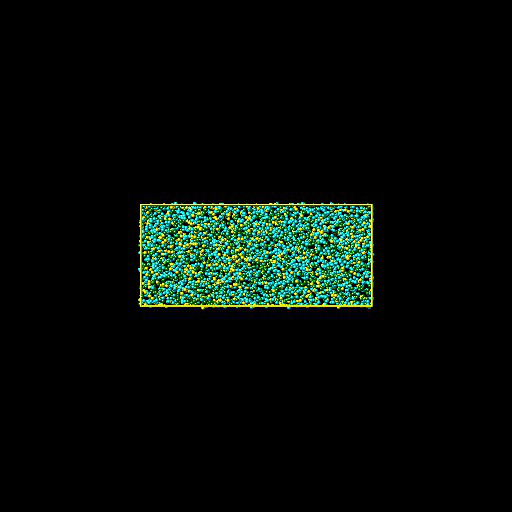

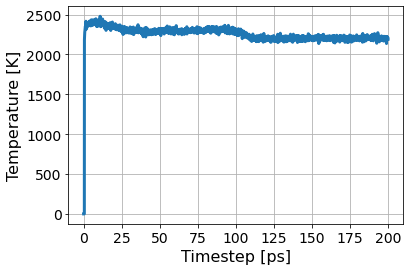

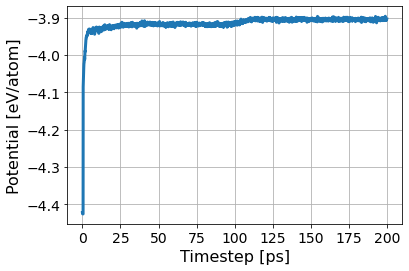

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0d298b0307334752bfbe2eb22d55b64c/inputs.yaml
       RUNS/0d298b0307334752bfbe2eb22d55b64c
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/0d298b0307334752bfbe2eb22d55b64c/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:20<00:00, 183.21s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0d298b0307334752bfbe2eb22d55b64c/inputs.yaml
       RUNS/0d298b0307334752bfbe2eb22d55b64c
Predicted melting temperature for this potential:  2297.51887278402
95% confidence interval:  1.7425762238177973
Fraction of system solid:  0.3055555555555556
Fraction of system liquid:  0.6786024305555556
Simulation Success Flag 0.0
Crystal Structure Info:  [1408.   44.   11.   18.    0. 3127. 4608.]


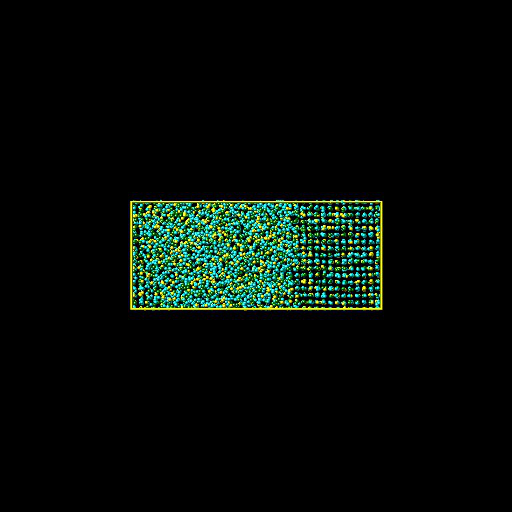

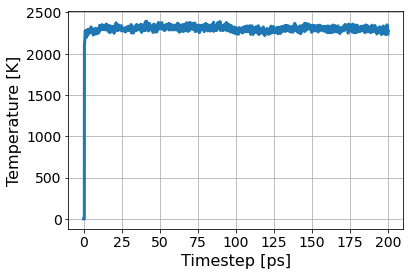

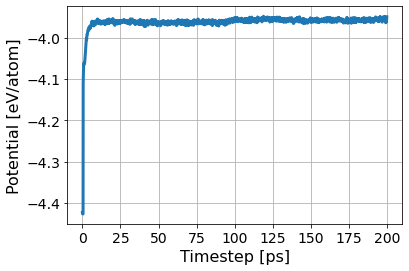

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/e0246ab4203542d3a41c82eedab6fa1e/inputs.yaml
       RUNS/e0246ab4203542d3a41c82eedab6fa1e
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/e0246ab4203542d3a41c82eedab6fa1e/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:42<00:00, 184.10s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/e0246ab4203542d3a41c82eedab6fa1e/inputs.yaml
       RUNS/e0246ab4203542d3a41c82eedab6fa1e
Predicted melting temperature for this potential:  2281.643966292135
95% confidence interval:  1.7635785131124915
Fraction of system solid:  0.5614149305555556
Fraction of system liquid:  0.4192708333333333
Simulation Success Flag 1.0
Crystal Structure Info:  [2587.   50.   31.    8.    0. 1932. 4608.]


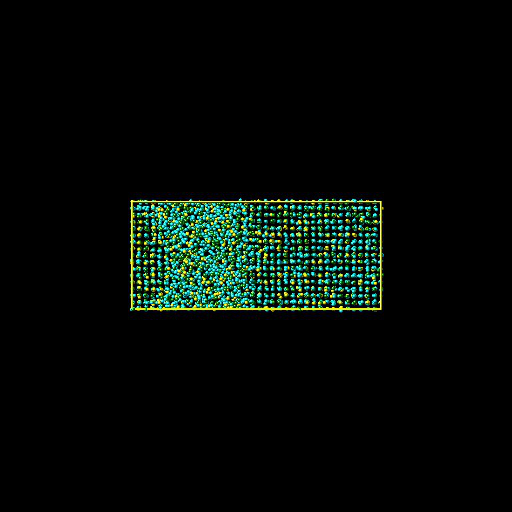

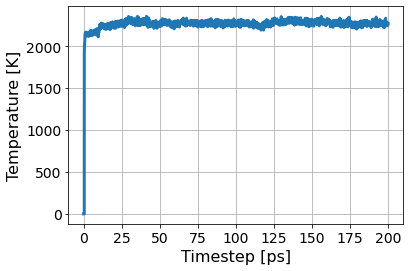

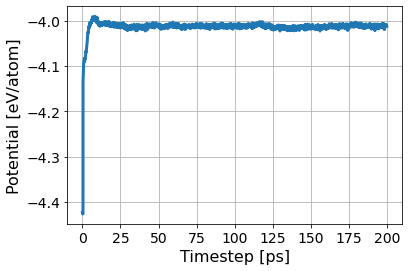

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  5
407
[0.0, 0.3, 0.2, 0.5, 0.0]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/ae42cda0ff464d7db242271f9ec5b91f/inputs.yaml
       RUNS/ae42cda0ff464d7db242271f9ec5b91f
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/ae42cda0ff464d7db242271f9ec5b91f/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:14:29<00:00, 178.80s/cell]  


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/ae42cda0ff464d7db242271f9ec5b91f/inputs.yaml
       RUNS/ae42cda0ff464d7db242271f9ec5b91f
Predicted melting temperature for this potential:  2702.701575156055
95% confidence interval:  1.7772444429516463
Fraction of system solid:  0.0010850694444444445
Fraction of system liquid:  0.9943576388888888
Simulation Success Flag 0.0
Crystal Structure Info:  [   5.   12.    0.    9.    0. 4582. 4608.]


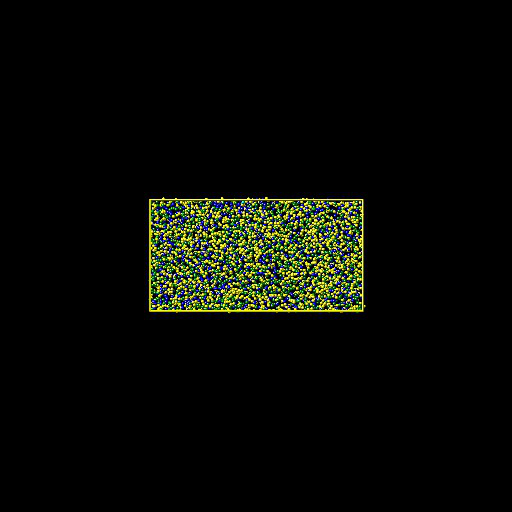

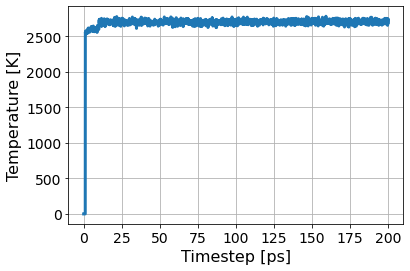

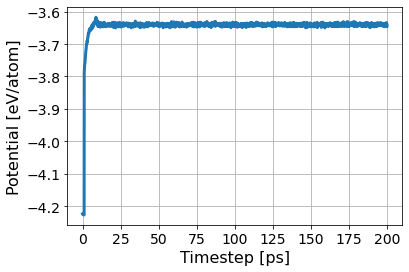

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/12c4e22702c34fe3831e39fb2cf27b3e/inputs.yaml
       RUNS/12c4e22702c34fe3831e39fb2cf27b3e
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/12c4e22702c34fe3831e39fb2cf27b3e/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:14:41<00:00, 179.28s/cell]  


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/12c4e22702c34fe3831e39fb2cf27b3e/inputs.yaml
       RUNS/12c4e22702c34fe3831e39fb2cf27b3e
Predicted melting temperature for this potential:  2497.6174395755306
95% confidence interval:  1.6384521192221395
Fraction of system solid:  0.0013020833333333333
Fraction of system liquid:  0.9904513888888888
Simulation Success Flag 0.0
Crystal Structure Info:  [6.000e+00 1.400e+01 1.000e+00 2.100e+01 2.000e+00 4.564e+03 4.608e+03]


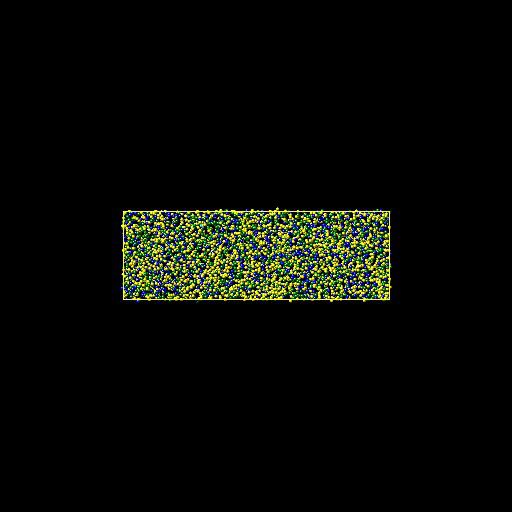

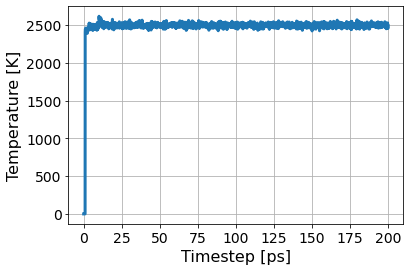

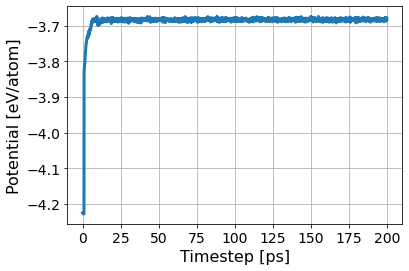

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/4ebe8daa322d4fb981bcfa317f95f504/inputs.yaml
       RUNS/4ebe8daa322d4fb981bcfa317f95f504
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/4ebe8daa322d4fb981bcfa317f95f504/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:15:19<00:00, 180.80s/cell]  


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/4ebe8daa322d4fb981bcfa317f95f504/inputs.yaml
       RUNS/4ebe8daa322d4fb981bcfa317f95f504
Predicted melting temperature for this potential:  2266.946197752809
95% confidence interval:  1.4647264830610738
Fraction of system solid:  0.0008680555555555555
Fraction of system liquid:  0.9867621527777778
Simulation Success Flag 0.0
Crystal Structure Info:  [4.000e+00 2.900e+01 7.000e+00 2.000e+01 1.000e+00 4.547e+03 4.608e+03]


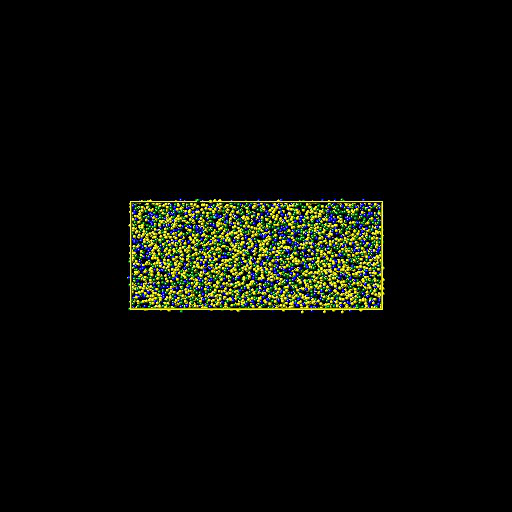

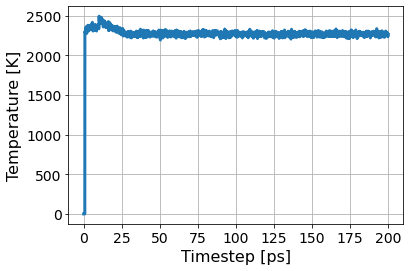

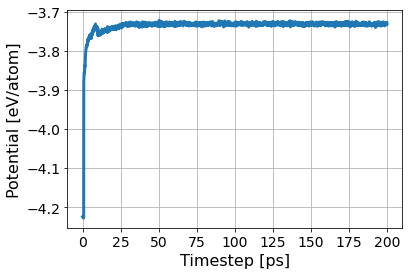

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/eda600f65c47467c86538c365ed6f696/inputs.yaml
       RUNS/eda600f65c47467c86538c365ed6f696
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/eda600f65c47467c86538c365ed6f696/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:15:34<00:00, 181.37s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/eda600f65c47467c86538c365ed6f696/inputs.yaml
       RUNS/eda600f65c47467c86538c365ed6f696
Predicted melting temperature for this potential:  2303.5543372034954
95% confidence interval:  1.6527198187492227
Fraction of system solid:  0.4225260416666667
Fraction of system liquid:  0.5609809027777778
Simulation Success Flag 1.0
Crystal Structure Info:  [1.947e+03 4.600e+01 2.600e+01 4.000e+00 0.000e+00 2.585e+03 4.608e+03]


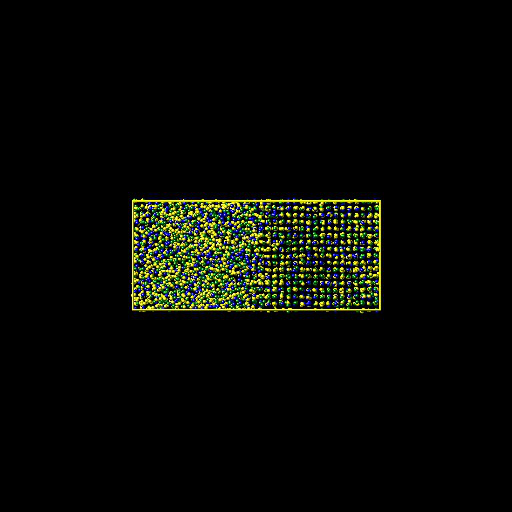

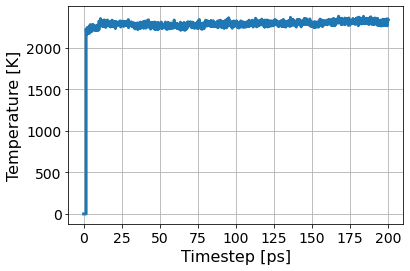

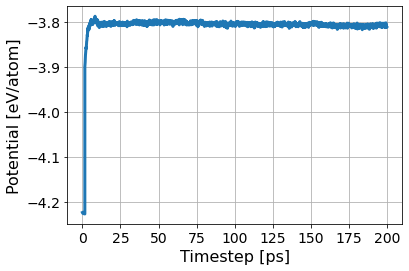

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  6
228
[0.2, 0.1, 0.0, 0.4, 0.3]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0342af23f6d8460dbdeae41410177c06/inputs.yaml
       RUNS/0342af23f6d8460dbdeae41410177c06
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/0342af23f6d8460dbdeae41410177c06/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:55<00:00, 187.04s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0342af23f6d8460dbdeae41410177c06/inputs.yaml
       RUNS/0342af23f6d8460dbdeae41410177c06
Predicted melting temperature for this potential:  2559.9974549313356
95% confidence interval:  1.7358503893501556
Fraction of system solid:  0.0008680555555555555
Fraction of system liquid:  0.9913194444444444
Simulation Success Flag 0.0
Crystal Structure Info:  [4.000e+00 1.400e+01 1.000e+00 2.000e+01 1.000e+00 4.568e+03 4.608e+03]


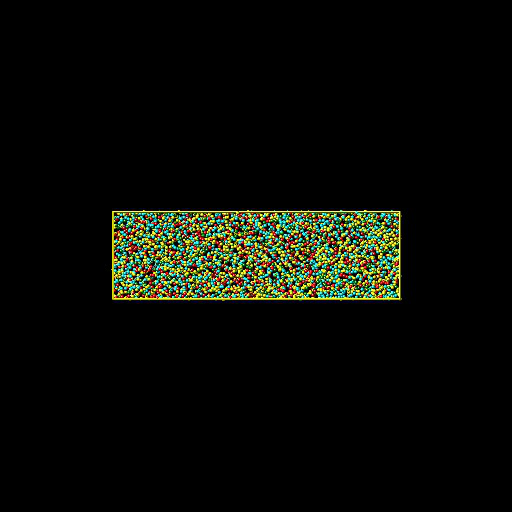

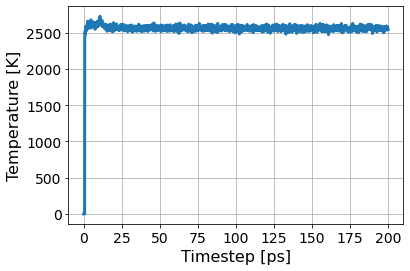

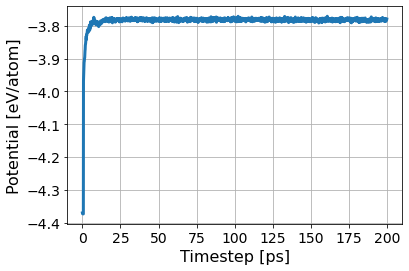

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/dffadb67a8e0492a9c2ff7aa1a90e673/inputs.yaml
       RUNS/dffadb67a8e0492a9c2ff7aa1a90e673
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/dffadb67a8e0492a9c2ff7aa1a90e673/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:55<00:00, 187.00s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/dffadb67a8e0492a9c2ff7aa1a90e673/inputs.yaml
       RUNS/dffadb67a8e0492a9c2ff7aa1a90e673
Predicted melting temperature for this potential:  2339.802433832709
95% confidence interval:  1.551957381594151
Fraction of system solid:  0.0013020833333333333
Fraction of system liquid:  0.9878472222222222
Simulation Success Flag 0.0
Crystal Structure Info:  [6.000e+00 2.700e+01 1.000e+00 2.000e+01 2.000e+00 4.552e+03 4.608e+03]


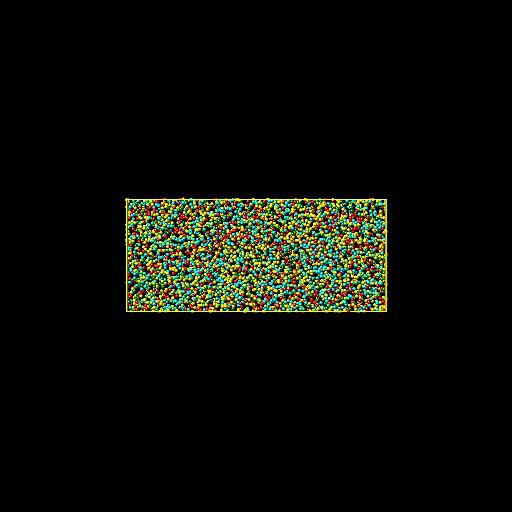

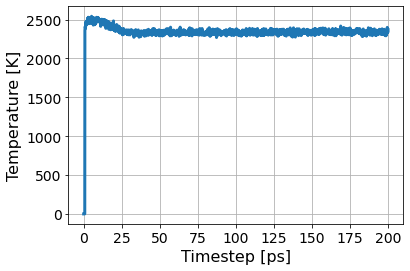

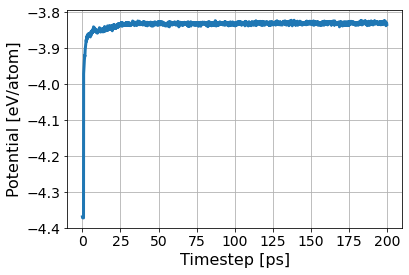

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/3feb30ba6ff14406bc4d382fc5aeea08/inputs.yaml
       RUNS/3feb30ba6ff14406bc4d382fc5aeea08
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/3feb30ba6ff14406bc4d382fc5aeea08/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:18:13<00:00, 187.76s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/3feb30ba6ff14406bc4d382fc5aeea08/inputs.yaml
       RUNS/3feb30ba6ff14406bc4d382fc5aeea08
Predicted melting temperature for this potential:  2357.2388033707866
95% confidence interval:  1.7540667681521773
Fraction of system solid:  0.2619357638888889
Fraction of system liquid:  0.720703125
Simulation Success Flag 0.0
Crystal Structure Info:  [1207.   46.   23.   11.    0. 3321. 4608.]


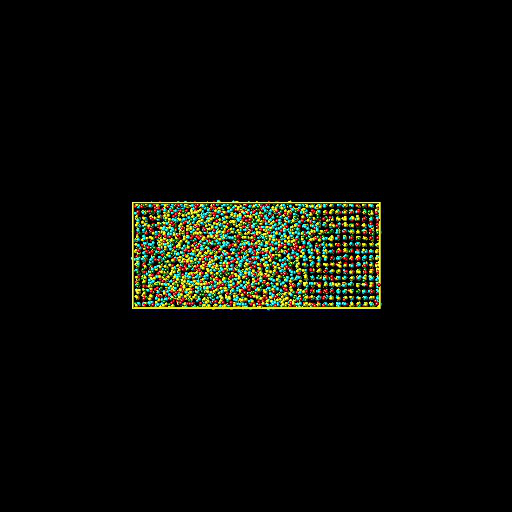

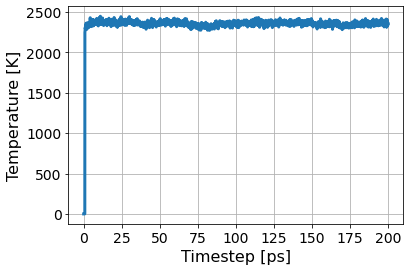

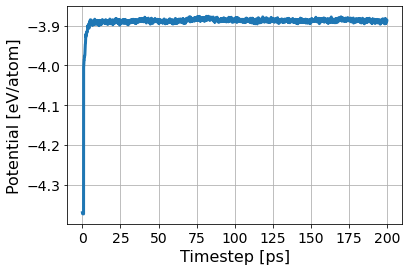

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/f0cffc9344284f3d8958b72d4d363022/inputs.yaml
       RUNS/f0cffc9344284f3d8958b72d4d363022
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/f0cffc9344284f3d8958b72d4d363022/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:18:43<00:00, 188.96s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/f0cffc9344284f3d8958b72d4d363022/inputs.yaml
       RUNS/f0cffc9344284f3d8958b72d4d363022
Predicted melting temperature for this potential:  2352.2761581772784
95% confidence interval:  1.8497295767725042
Fraction of system solid:  0.5559895833333334
Fraction of system liquid:  0.4249131944444444
Simulation Success Flag 1.0
Crystal Structure Info:  [2.562e+03 4.900e+01 3.500e+01 3.000e+00 1.000e+00 1.958e+03 4.608e+03]


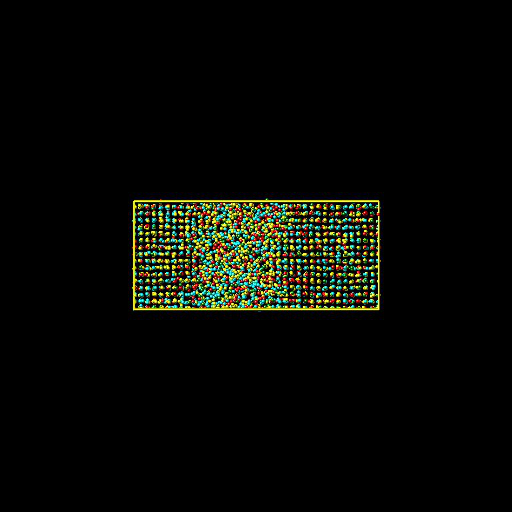

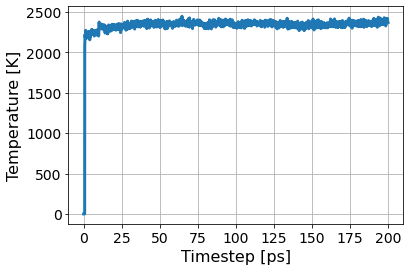

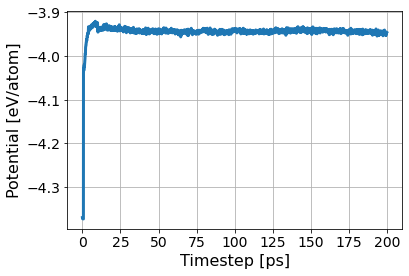

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  7
394
[0.0, 0.3, 0.0, 0.3, 0.4]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/8d69c6d3b08c4d3fa40baa0f06370b38/inputs.yaml
       RUNS/8d69c6d3b08c4d3fa40baa0f06370b38
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/8d69c6d3b08c4d3fa40baa0f06370b38/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:15:10<00:00, 180.41s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/8d69c6d3b08c4d3fa40baa0f06370b38/inputs.yaml
       RUNS/8d69c6d3b08c4d3fa40baa0f06370b38
Predicted melting temperature for this potential:  2474.700951935081
95% confidence interval:  1.5914776117321174
Fraction of system solid:  0.00043402777777777775
Fraction of system liquid:  0.9891493055555556
Simulation Success Flag 0.0
Crystal Structure Info:  [2.000e+00 2.400e+01 0.000e+00 2.400e+01 0.000e+00 4.558e+03 4.608e+03]


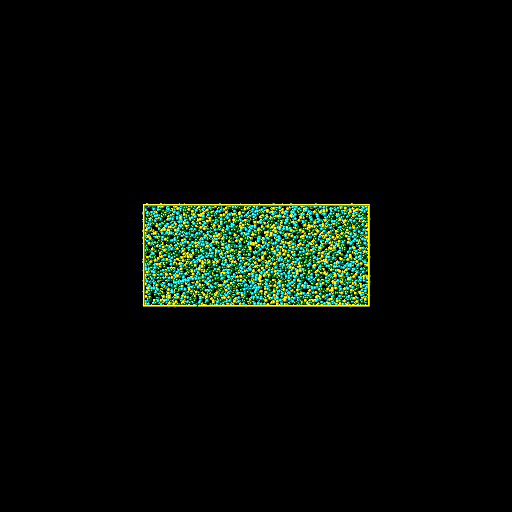

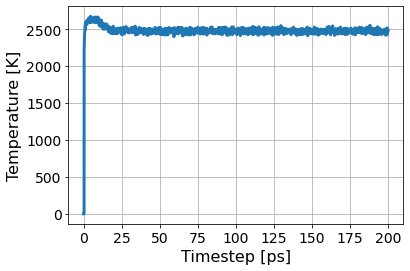

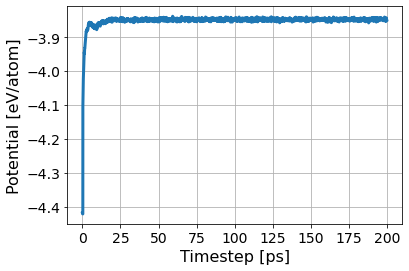

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/ea817498936d47f8aabc4cfef466c222/inputs.yaml
       RUNS/ea817498936d47f8aabc4cfef466c222
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/ea817498936d47f8aabc4cfef466c222/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:15:45<00:00, 181.81s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/ea817498936d47f8aabc4cfef466c222/inputs.yaml
       RUNS/ea817498936d47f8aabc4cfef466c222
Predicted melting temperature for this potential:  2334.313781398252
95% confidence interval:  1.467762174150264
Fraction of system solid:  0.002387152777777778
Fraction of system liquid:  0.9839409722222222
Simulation Success Flag 0.0
Crystal Structure Info:  [1.100e+01 2.100e+01 1.000e+01 3.000e+01 2.000e+00 4.534e+03 4.608e+03]


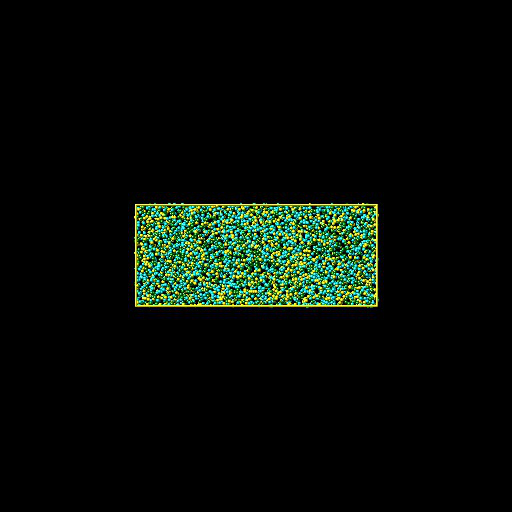

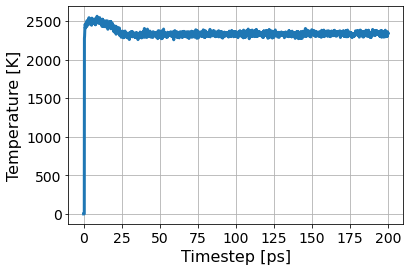

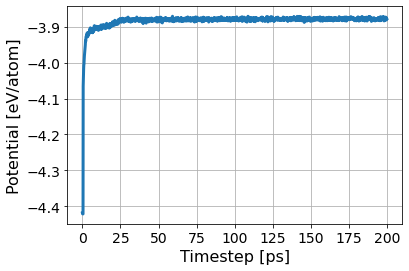

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/db790b213a984d02ace86b6c7a125899/inputs.yaml
       RUNS/db790b213a984d02ace86b6c7a125899
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/db790b213a984d02ace86b6c7a125899/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:17<00:00, 183.09s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/db790b213a984d02ace86b6c7a125899/inputs.yaml
       RUNS/db790b213a984d02ace86b6c7a125899
Predicted melting temperature for this potential:  2348.364677278402
95% confidence interval:  2.172488328882887
Fraction of system solid:  0.23133680555555555
Fraction of system liquid:  0.7371961805555556
Simulation Success Flag 0.0
Crystal Structure Info:  [1066.   75.   53.   17.    0. 3397. 4608.]


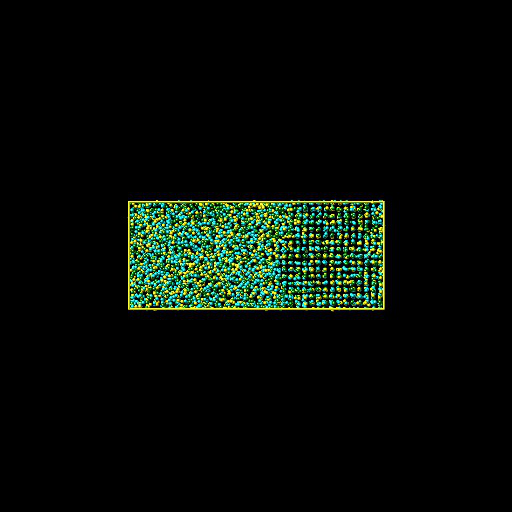

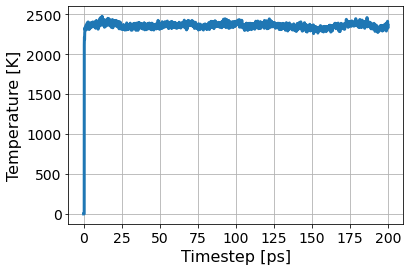

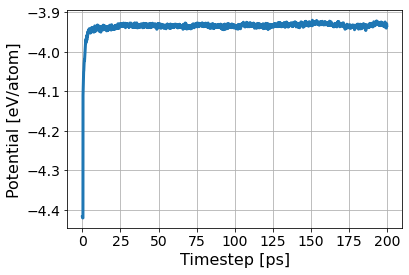

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/70ca0a71a43b44048df56146219da61a/inputs.yaml
       RUNS/70ca0a71a43b44048df56146219da61a
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/70ca0a71a43b44048df56146219da61a/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:42<00:00, 184.09s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/70ca0a71a43b44048df56146219da61a/inputs.yaml
       RUNS/70ca0a71a43b44048df56146219da61a
Predicted melting temperature for this potential:  2337.390204244694
95% confidence interval:  1.708140875164239
Fraction of system solid:  0.4945746527777778
Fraction of system liquid:  0.4893663194444444
Simulation Success Flag 1.0
Crystal Structure Info:  [2279.   44.   24.    6.    0. 2255. 4608.]


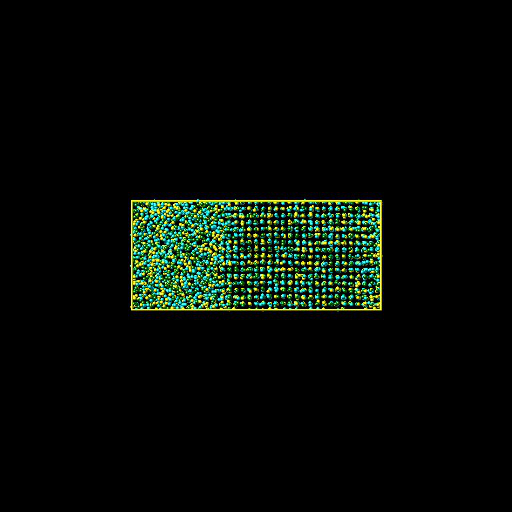

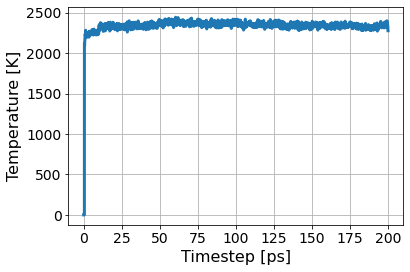

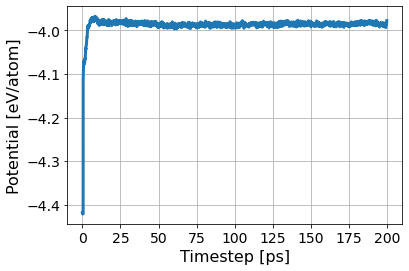

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  8
324
[0.1, 0.2, 0.0, 0.3, 0.4]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/21a314bd986b434aadcbdde1fc7bb712/inputs.yaml
       RUNS/21a314bd986b434aadcbdde1fc7bb712
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/21a314bd986b434aadcbdde1fc7bb712/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:17<00:00, 185.50s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/21a314bd986b434aadcbdde1fc7bb712/inputs.yaml
       RUNS/21a314bd986b434aadcbdde1fc7bb712
Predicted melting temperature for this potential:  2449.333090886392
95% confidence interval:  1.6216544565403201
Fraction of system solid:  0.0010850694444444445
Fraction of system liquid:  0.9893663194444444
Simulation Success Flag 0.0
Crystal Structure Info:  [5.000e+00 1.900e+01 0.000e+00 2.400e+01 1.000e+00 4.559e+03 4.608e+03]


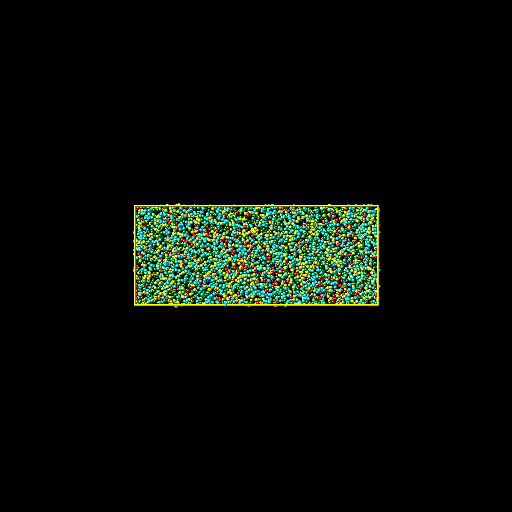

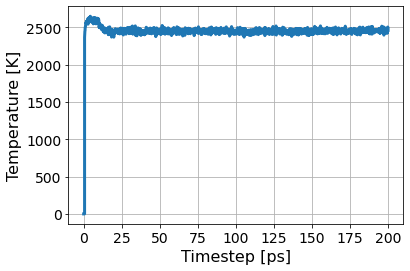

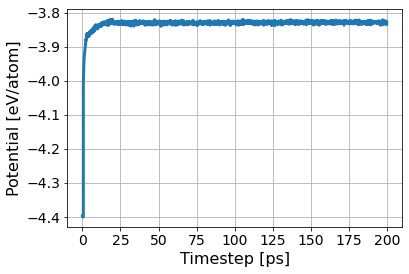

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/7870c8c2e52e482c86971427ebee77a0/inputs.yaml
       RUNS/7870c8c2e52e482c86971427ebee77a0
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/7870c8c2e52e482c86971427ebee77a0/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:24<00:00, 185.78s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/7870c8c2e52e482c86971427ebee77a0/inputs.yaml
       RUNS/7870c8c2e52e482c86971427ebee77a0
Predicted melting temperature for this potential:  2295.0607013732833
95% confidence interval:  1.4911295096849473
Fraction of system solid:  0.002170138888888889
Fraction of system liquid:  0.9869791666666666
Simulation Success Flag 0.0
Crystal Structure Info:  [1.000e+01 2.400e+01 0.000e+00 2.400e+01 2.000e+00 4.548e+03 4.608e+03]


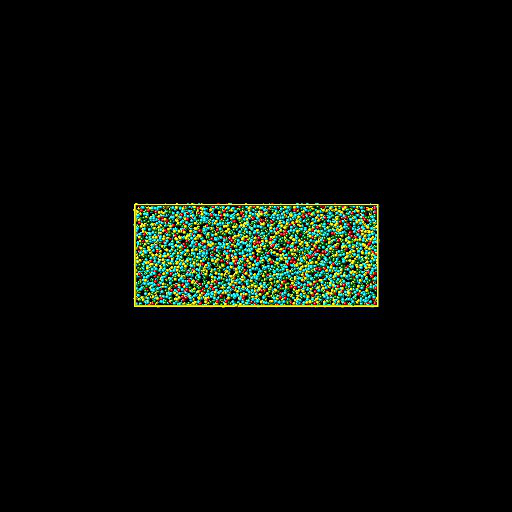

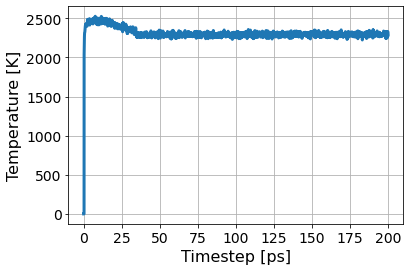

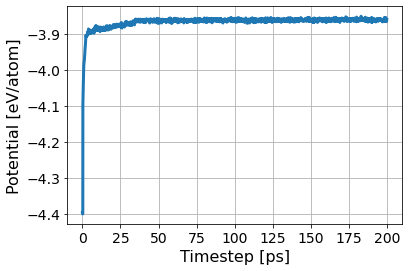

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/9bd8f97d19944e47ad3e2a3e72b7807b/inputs.yaml
       RUNS/9bd8f97d19944e47ad3e2a3e72b7807b
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/9bd8f97d19944e47ad3e2a3e72b7807b/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:18:11<00:00, 187.67s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/9bd8f97d19944e47ad3e2a3e72b7807b/inputs.yaml
       RUNS/9bd8f97d19944e47ad3e2a3e72b7807b
Predicted melting temperature for this potential:  2329.393104993758
95% confidence interval:  1.9351001847940237
Fraction of system solid:  0.3109809027777778
Fraction of system liquid:  0.6736111111111112
Simulation Success Flag 0.0
Crystal Structure Info:  [1433.   38.   14.   19.    0. 3104. 4608.]


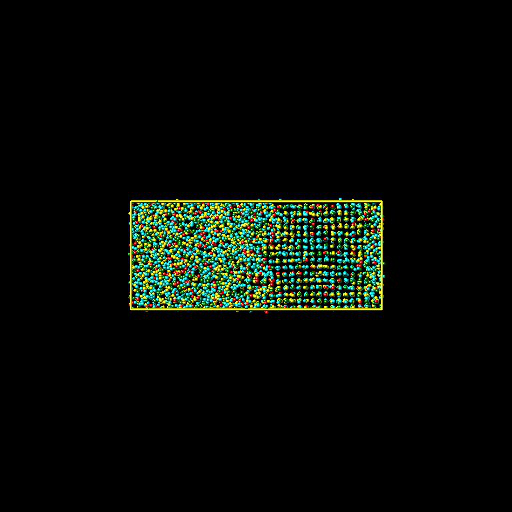

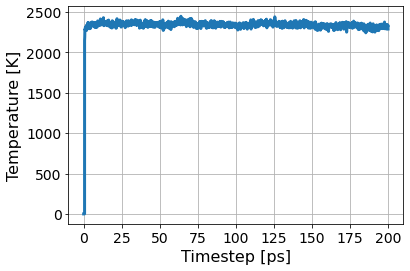

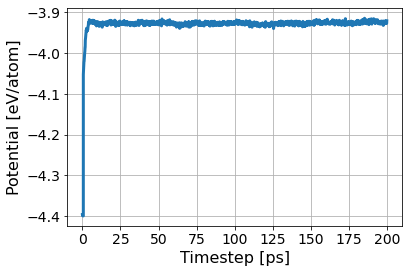

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/3a5f605319104e7d84c69aed29852c4f/inputs.yaml
       RUNS/3a5f605319104e7d84c69aed29852c4f
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/3a5f605319104e7d84c69aed29852c4f/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:18:31<00:00, 188.47s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/3a5f605319104e7d84c69aed29852c4f/inputs.yaml
       RUNS/3a5f605319104e7d84c69aed29852c4f
Predicted melting temperature for this potential:  2328.247563670412
95% confidence interval:  1.73174634677574
Fraction of system solid:  0.4702690972222222
Fraction of system liquid:  0.5080295138888888
Simulation Success Flag 1.0
Crystal Structure Info:  [2.167e+03 6.500e+01 2.500e+01 9.000e+00 1.000e+00 2.341e+03 4.608e+03]


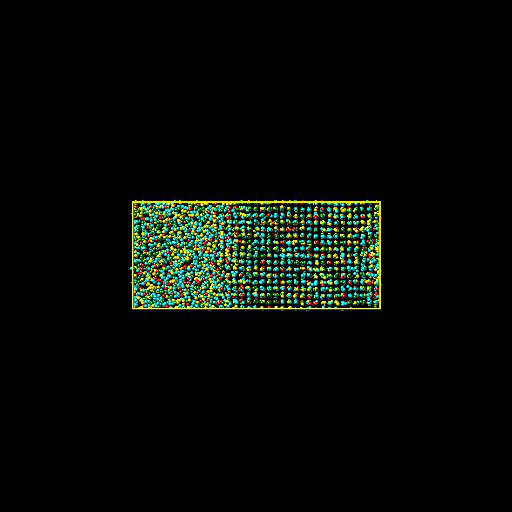

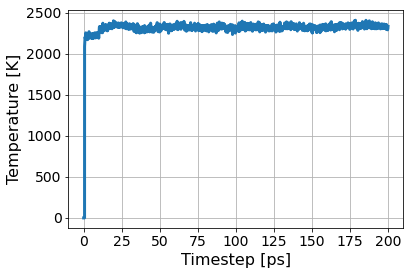

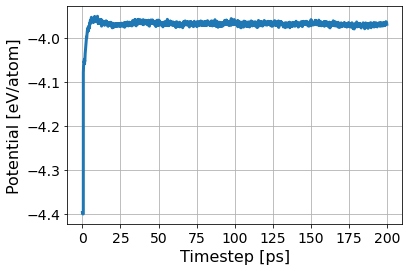

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  9
406
[0.0, 0.3, 0.2, 0.4, 0.1]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0852a4bce520496697d0ee12a4331930/inputs.yaml
       RUNS/0852a4bce520496697d0ee12a4331930
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/0852a4bce520496697d0ee12a4331930/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:22<00:00, 183.30s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/0852a4bce520496697d0ee12a4331930/inputs.yaml
       RUNS/0852a4bce520496697d0ee12a4331930
Predicted melting temperature for this potential:  2533.410717977528
95% confidence interval:  1.6487769858340788
Fraction of system solid:  0.00021701388888888888
Fraction of system liquid:  0.9950086805555556
Simulation Success Flag 0.0
Crystal Structure Info:  [1.000e+00 7.000e+00 1.000e+00 1.100e+01 3.000e+00 4.585e+03 4.608e+03]


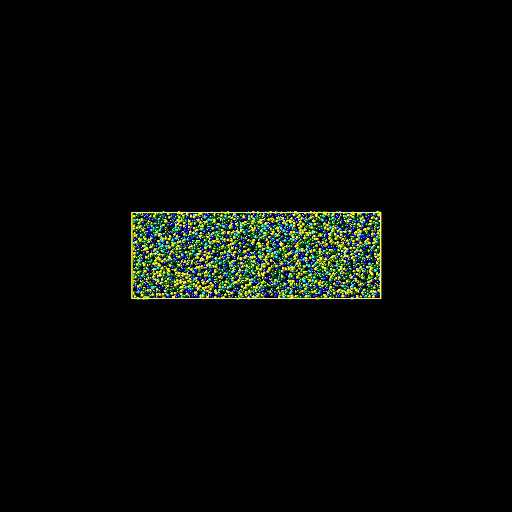

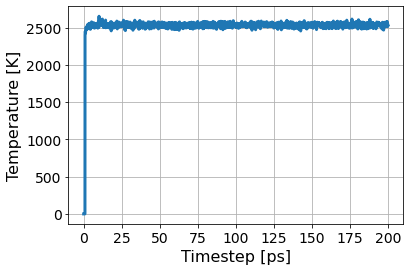

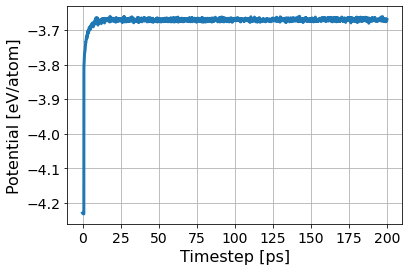

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/2d6e9f0a55994bffa252b759f3df7f8a/inputs.yaml
       RUNS/2d6e9f0a55994bffa252b759f3df7f8a
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/2d6e9f0a55994bffa252b759f3df7f8a/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:36<00:00, 183.87s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/2d6e9f0a55994bffa252b759f3df7f8a/inputs.yaml
       RUNS/2d6e9f0a55994bffa252b759f3df7f8a
Predicted melting temperature for this potential:  2321.728609238452
95% confidence interval:  1.554545022870673
Fraction of system solid:  0.0013020833333333333
Fraction of system liquid:  0.9904513888888888
Simulation Success Flag 0.0
Crystal Structure Info:  [6.000e+00 1.900e+01 3.000e+00 1.500e+01 1.000e+00 4.564e+03 4.608e+03]


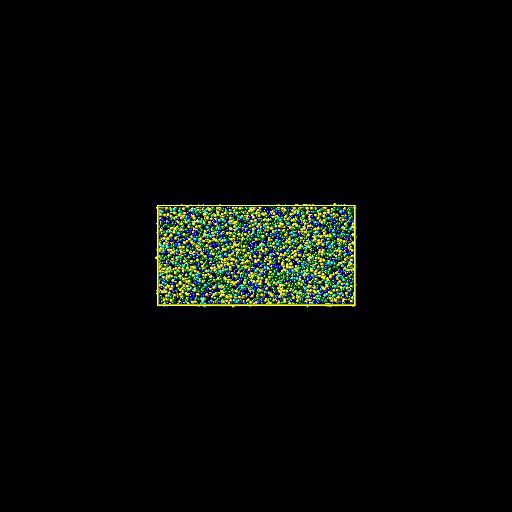

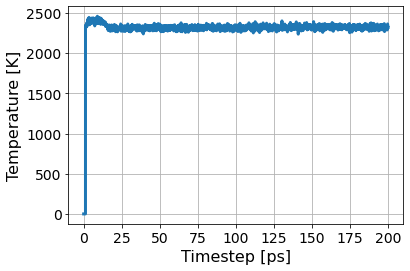

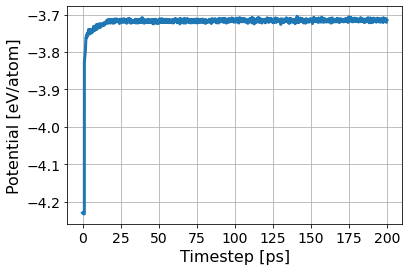

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/7634ec78f1bb4adca47feb769b2d23bb/inputs.yaml
       RUNS/7634ec78f1bb4adca47feb769b2d23bb
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/7634ec78f1bb4adca47feb769b2d23bb/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:03<00:00, 184.94s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/7634ec78f1bb4adca47feb769b2d23bb/inputs.yaml
       RUNS/7634ec78f1bb4adca47feb769b2d23bb
Predicted melting temperature for this potential:  2133.3727063670412
95% confidence interval:  1.4344566095410902
Fraction of system solid:  0.0015190972222222222
Fraction of system liquid:  0.9852430555555556
Simulation Success Flag 0.0
Crystal Structure Info:  [7.000e+00 2.900e+01 3.000e+00 2.800e+01 1.000e+00 4.540e+03 4.608e+03]


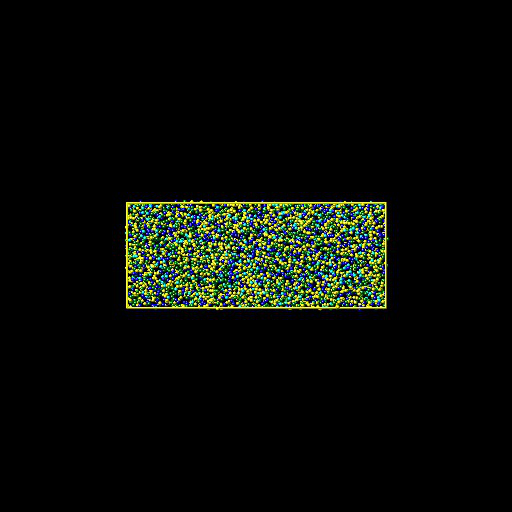

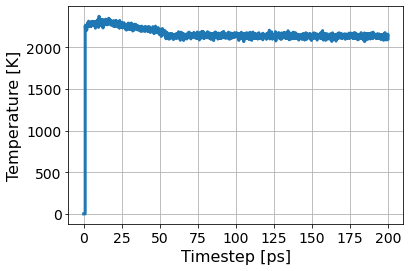

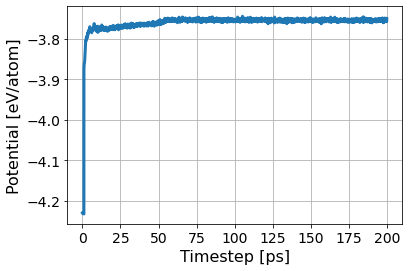

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/2f6a1a1f8b7248f7a7222cc47563a971/inputs.yaml
       RUNS/2f6a1a1f8b7248f7a7222cc47563a971
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/2f6a1a1f8b7248f7a7222cc47563a971/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:17<00:00, 185.51s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/2f6a1a1f8b7248f7a7222cc47563a971/inputs.yaml
       RUNS/2f6a1a1f8b7248f7a7222cc47563a971
Predicted melting temperature for this potential:  2224.226818476904
95% confidence interval:  1.5581598014973594
Fraction of system solid:  0.3721788194444444
Fraction of system liquid:  0.6098090277777778
Simulation Success Flag 1.0
Crystal Structure Info:  [1715.   40.   30.   13.    0. 2810. 4608.]


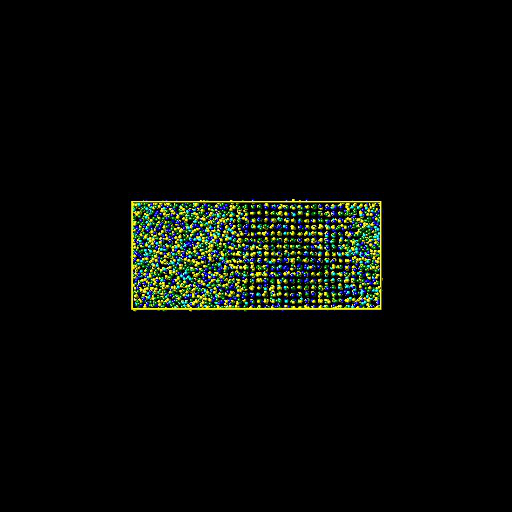

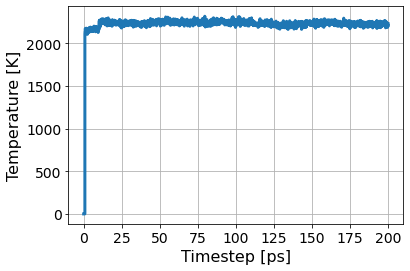

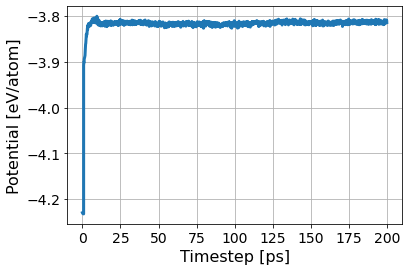

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  10
401
[0.0, 0.3, 0.1, 0.5, 0.1]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/7b364041dab84391a1d9a4689125f2ee/inputs.yaml
       RUNS/7b364041dab84391a1d9a4689125f2ee
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/7b364041dab84391a1d9a4689125f2ee/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:00<00:00, 182.42s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/7b364041dab84391a1d9a4689125f2ee/inputs.yaml
       RUNS/7b364041dab84391a1d9a4689125f2ee
Predicted melting temperature for this potential:  2669.895319600499
95% confidence interval:  1.6877697731775445
Fraction of system solid:  0.00021701388888888888
Fraction of system liquid:  0.9939236111111112
Simulation Success Flag 0.0
Crystal Structure Info:  [1.000e+00 1.300e+01 1.000e+00 1.200e+01 1.000e+00 4.580e+03 4.608e+03]


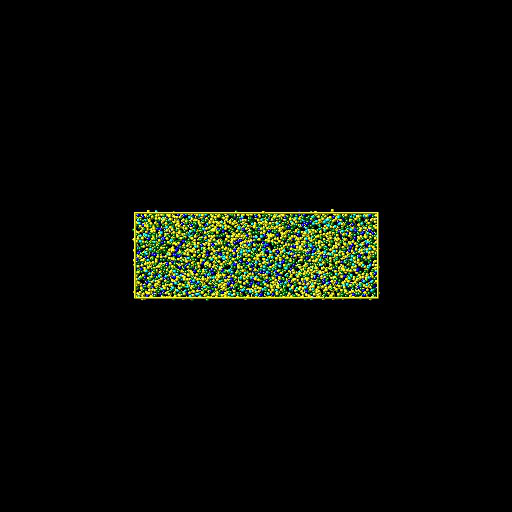

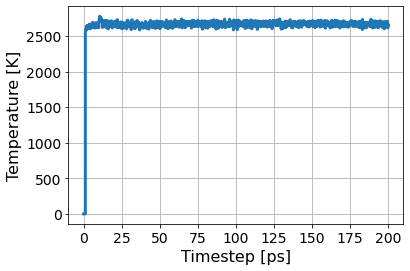

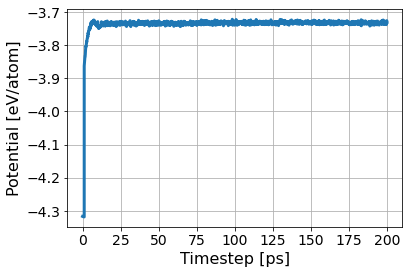

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/cd1dced737da4def82e9ec4950a9c836/inputs.yaml
       RUNS/cd1dced737da4def82e9ec4950a9c836
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/cd1dced737da4def82e9ec4950a9c836/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:09<00:00, 185.19s/cell]  


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/cd1dced737da4def82e9ec4950a9c836/inputs.yaml
       RUNS/cd1dced737da4def82e9ec4950a9c836
Predicted melting temperature for this potential:  2421.5604951310866
95% confidence interval:  1.6447222925742597
Fraction of system solid:  0.0010850694444444445
Fraction of system liquid:  0.9904513888888888
Simulation Success Flag 0.0
Crystal Structure Info:  [5.000e+00 2.100e+01 2.000e+00 1.500e+01 1.000e+00 4.564e+03 4.608e+03]


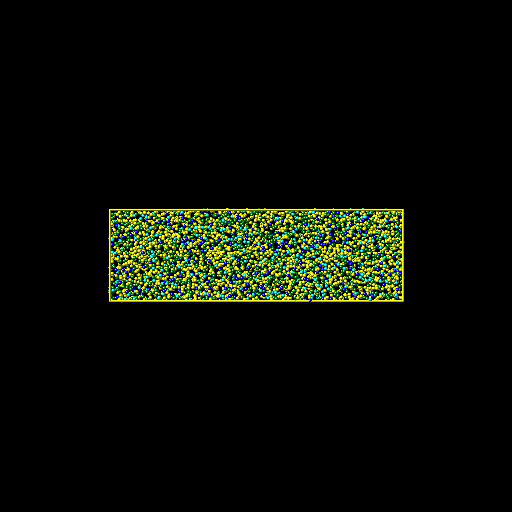

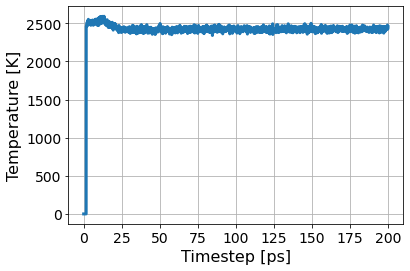

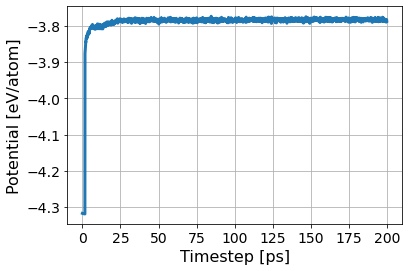

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/cd6ed428da7a441babad5be6b8d8980e/inputs.yaml
       RUNS/cd6ed428da7a441babad5be6b8d8980e
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/cd6ed428da7a441babad5be6b8d8980e/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:26<00:00, 185.86s/cell]  


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/cd6ed428da7a441babad5be6b8d8980e/inputs.yaml
       RUNS/cd6ed428da7a441babad5be6b8d8980e
Predicted melting temperature for this potential:  2383.1057134831462
95% confidence interval:  1.9895831936899129
Fraction of system solid:  0.2495659722222222
Fraction of system liquid:  0.7302517361111112
Simulation Success Flag 0.0
Crystal Structure Info:  [1150.   50.   24.   19.    0. 3365. 4608.]


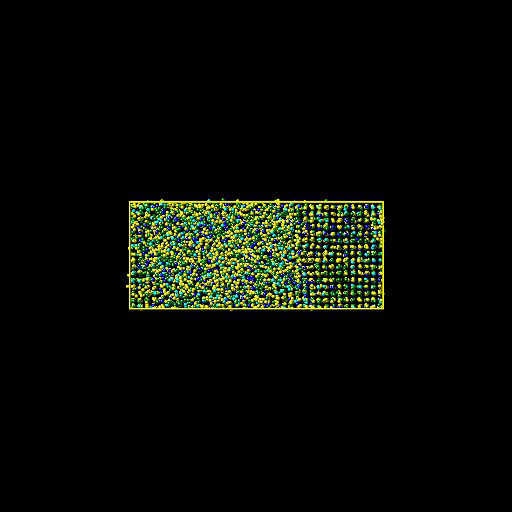

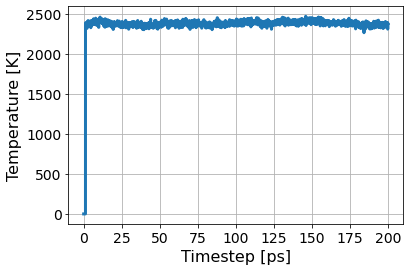

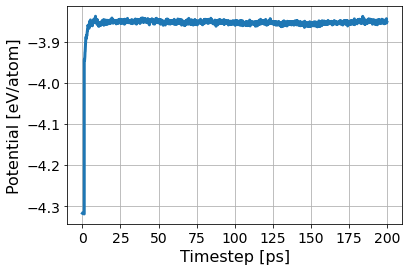

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/028379154e654f6ab9e24f936ba12632/inputs.yaml
       RUNS/028379154e654f6ab9e24f936ba12632
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/028379154e654f6ab9e24f936ba12632/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:36<00:00, 186.27s/cell]  


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/028379154e654f6ab9e24f936ba12632/inputs.yaml
       RUNS/028379154e654f6ab9e24f936ba12632
Predicted melting temperature for this potential:  2389.709413483146
95% confidence interval:  1.7189186265448273
Fraction of system solid:  0.5249565972222222
Fraction of system liquid:  0.4537760416666667
Simulation Success Flag 1.0
Crystal Structure Info:  [2.419e+03 6.000e+01 3.500e+01 3.000e+00 0.000e+00 2.091e+03 4.608e+03]


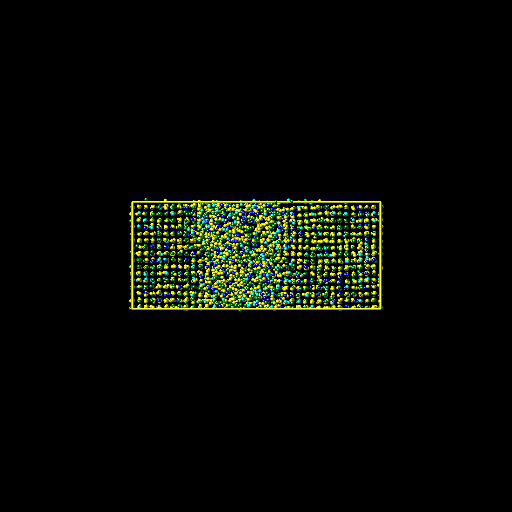

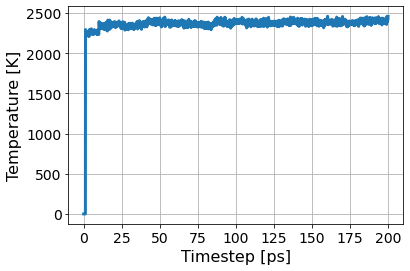

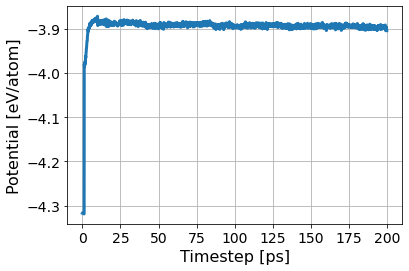

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  11
395
[0.0, 0.3, 0.0, 0.4, 0.3]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/46039e338bcf4a76bac096179893007b/inputs.yaml
       RUNS/46039e338bcf4a76bac096179893007b
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/46039e338bcf4a76bac096179893007b/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:15:28<00:00, 181.14s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/46039e338bcf4a76bac096179893007b/inputs.yaml
       RUNS/46039e338bcf4a76bac096179893007b
Predicted melting temperature for this potential:  2605.1908802746566
95% confidence interval:  1.7469615826709641
Fraction of system solid:  0.00021701388888888888
Fraction of system liquid:  0.9915364583333334
Simulation Success Flag 0.0
Crystal Structure Info:  [1.000e+00 1.800e+01 3.000e+00 1.700e+01 0.000e+00 4.569e+03 4.608e+03]


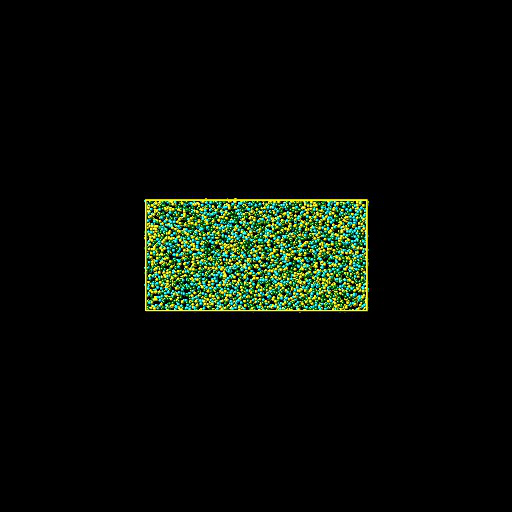

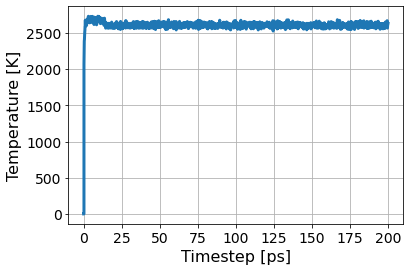

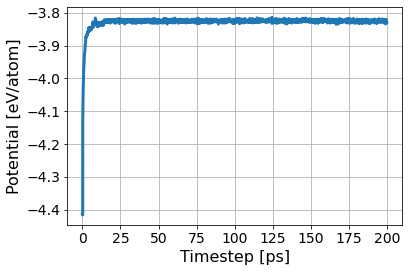

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/f352f8cd6cf74fba8b3b36ac903248fd/inputs.yaml
       RUNS/f352f8cd6cf74fba8b3b36ac903248fd
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/f352f8cd6cf74fba8b3b36ac903248fd/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:09<00:00, 182.79s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/f352f8cd6cf74fba8b3b36ac903248fd/inputs.yaml
       RUNS/f352f8cd6cf74fba8b3b36ac903248fd
Predicted melting temperature for this potential:  2390.559356554307
95% confidence interval:  1.5673178632375069
Fraction of system solid:  0.001736111111111111
Fraction of system liquid:  0.9854600694444444
Simulation Success Flag 0.0
Crystal Structure Info:  [   8.   24.    5.   30.    0. 4541. 4608.]


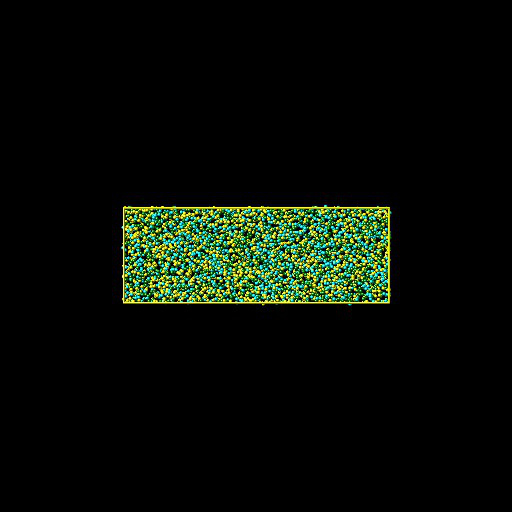

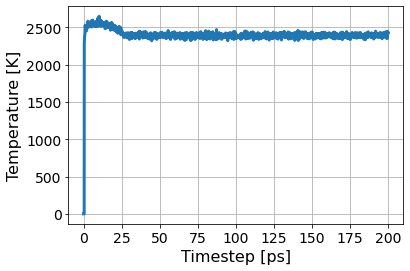

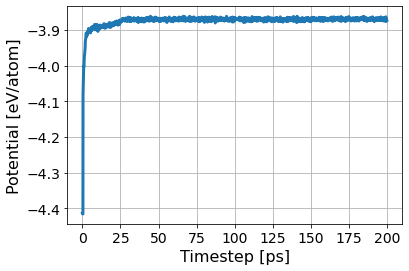

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/383615950e5f40bf89b13f0a0db0c6c6/inputs.yaml
       RUNS/383615950e5f40bf89b13f0a0db0c6c6
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/383615950e5f40bf89b13f0a0db0c6c6/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:26<00:00, 185.86s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/383615950e5f40bf89b13f0a0db0c6c6/inputs.yaml
       RUNS/383615950e5f40bf89b13f0a0db0c6c6
Predicted melting temperature for this potential:  2417.5255797752807
95% confidence interval:  1.8613862185237906
Fraction of system solid:  0.3077256944444444
Fraction of system liquid:  0.6701388888888888
Simulation Success Flag 0.0
Crystal Structure Info:  [1.418e+03 6.600e+01 2.400e+01 1.000e+01 2.000e+00 3.088e+03 4.608e+03]


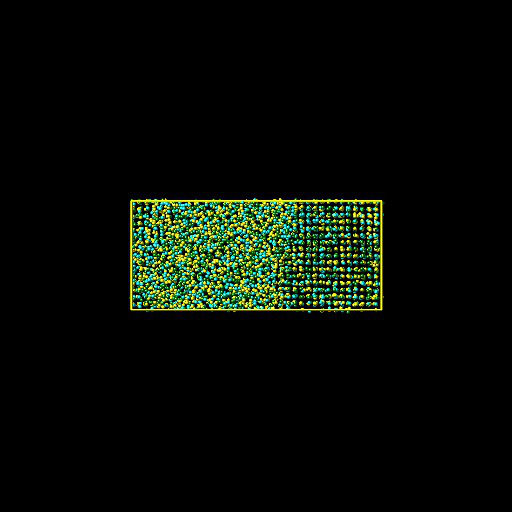

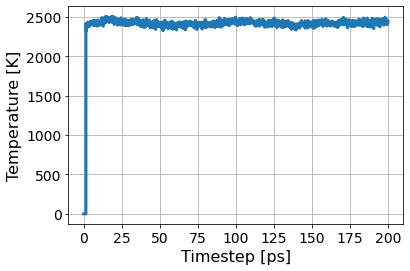

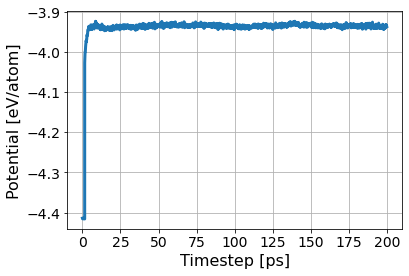

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/1b46d9265bbb4dd6b79f0a6f0511e255/inputs.yaml
       RUNS/1b46d9265bbb4dd6b79f0a6f0511e255
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/1b46d9265bbb4dd6b79f0a6f0511e255/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:16:36<00:00, 183.87s/cell]  


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/1b46d9265bbb4dd6b79f0a6f0511e255/inputs.yaml
       RUNS/1b46d9265bbb4dd6b79f0a6f0511e255
Predicted melting temperature for this potential:  2425.4543389513105
95% confidence interval:  1.896032610383902
Fraction of system solid:  0.5483940972222222
Fraction of system liquid:  0.4309895833333333
Simulation Success Flag 1.0
Crystal Structure Info:  [2.527e+03 6.400e+01 2.800e+01 3.000e+00 0.000e+00 1.986e+03 4.608e+03]


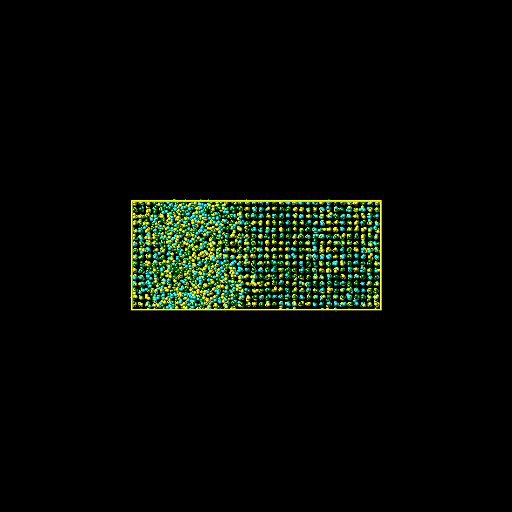

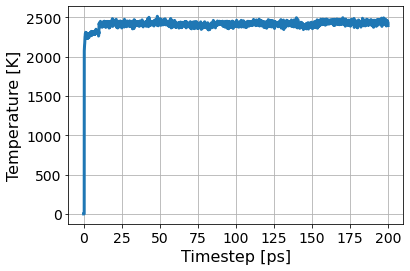

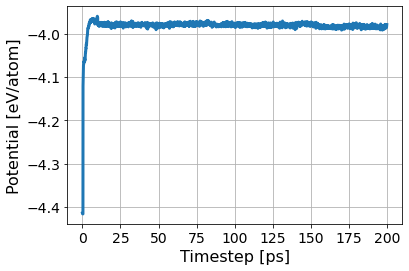

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  12
553
[0.0, 0.5, 0.1, 0.4, 0.0]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/3595d3c21bae45d4b08a62582aca7763/inputs.yaml
       RUNS/3595d3c21bae45d4b08a62582aca7763
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/3595d3c21bae45d4b08a62582aca7763/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:14:00<00:00, 177.62s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/3595d3c21bae45d4b08a62582aca7763/inputs.yaml
       RUNS/3595d3c21bae45d4b08a62582aca7763
Predicted melting temperature for this potential:  2526.6592352059924
95% confidence interval:  1.6700951715192491
Fraction of system solid:  0.0015190972222222222
Fraction of system liquid:  0.9880642361111112
Simulation Success Flag 0.0
Crystal Structure Info:  [7.000e+00 2.400e+01 1.000e+00 2.200e+01 1.000e+00 4.553e+03 4.608e+03]


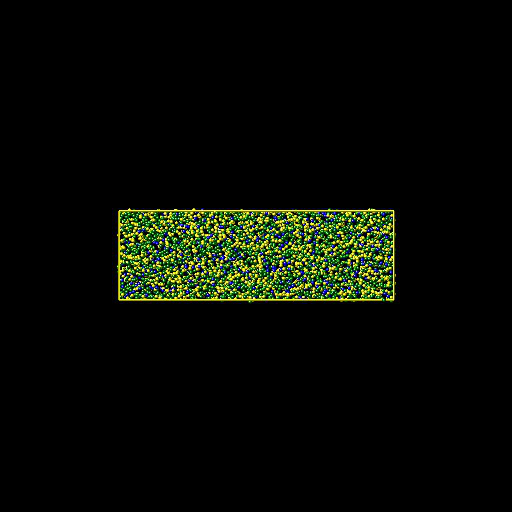

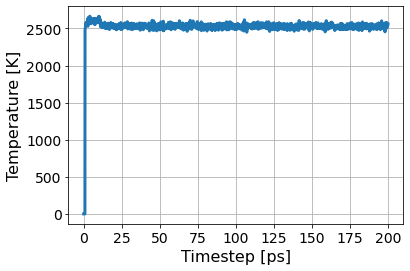

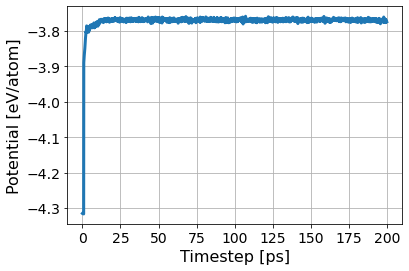

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/b5c46141348148e5aedce54186451cad/inputs.yaml
       RUNS/b5c46141348148e5aedce54186451cad
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/b5c46141348148e5aedce54186451cad/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:14:53<00:00, 179.74s/cell]  


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/b5c46141348148e5aedce54186451cad/inputs.yaml
       RUNS/b5c46141348148e5aedce54186451cad
Predicted melting temperature for this potential:  2344.7176650436954
95% confidence interval:  1.534587330896165
Fraction of system solid:  0.0013020833333333333
Fraction of system liquid:  0.9871961805555556
Simulation Success Flag 0.0
Crystal Structure Info:  [6.000e+00 2.700e+01 3.000e+00 2.200e+01 1.000e+00 4.549e+03 4.608e+03]


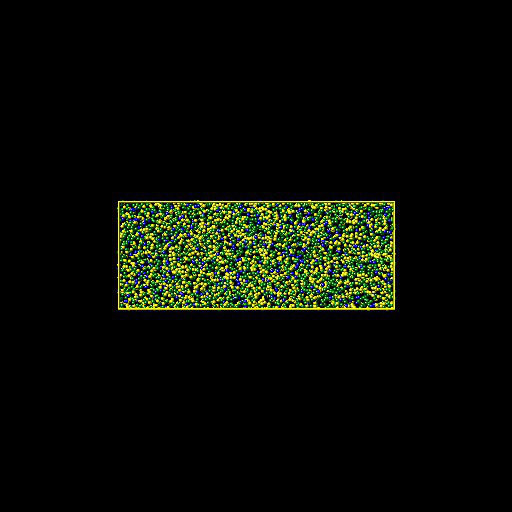

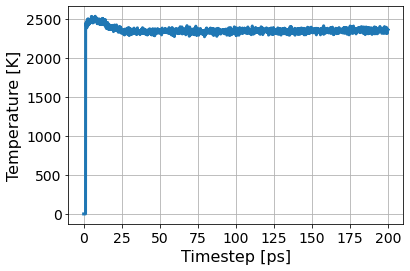

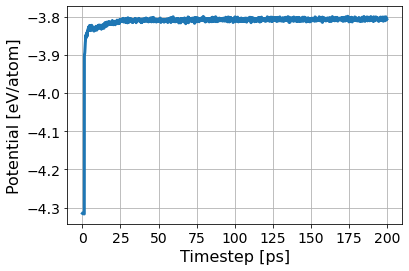

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/4d97fb540ff04d44b0378132b91b8328/inputs.yaml
       RUNS/4d97fb540ff04d44b0378132b91b8328
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/4d97fb540ff04d44b0378132b91b8328/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:13:36<00:00, 176.65s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/4d97fb540ff04d44b0378132b91b8328/inputs.yaml
       RUNS/4d97fb540ff04d44b0378132b91b8328
Predicted melting temperature for this potential:  2322.2115354556804
95% confidence interval:  1.7881515636598289
Fraction of system solid:  0.015625
Fraction of system liquid:  0.7322048611111112
Simulation Success Flag 0.0
Crystal Structure Info:  [  72.  247.  896.   19.    0. 3374. 4608.]


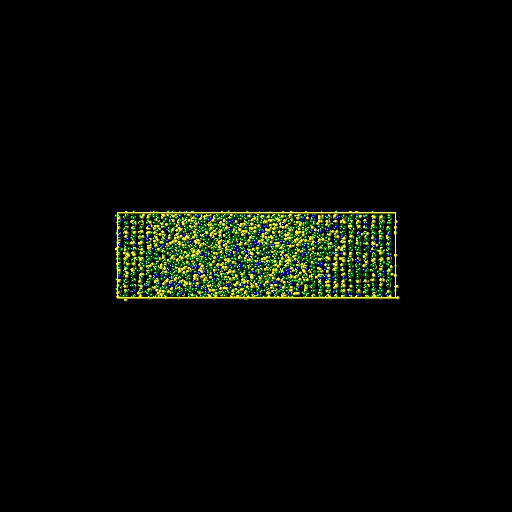

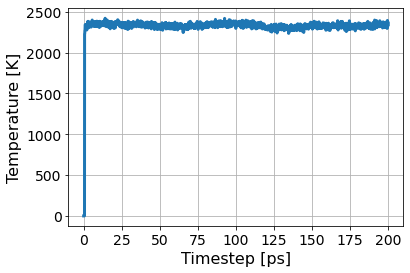

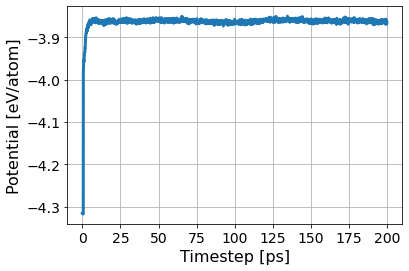

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/185848c78b85404a80f335fcbded54c4/inputs.yaml
       RUNS/185848c78b85404a80f335fcbded54c4
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/185848c78b85404a80f335fcbded54c4/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:14:48<00:00, 179.54s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/185848c78b85404a80f335fcbded54c4/inputs.yaml
       RUNS/185848c78b85404a80f335fcbded54c4
Predicted melting temperature for this potential:  2319.2713380774035
95% confidence interval:  1.7544039851915383
Fraction of system solid:  0.4453125
Fraction of system liquid:  0.5301649305555556
Simulation Success Flag 1.0
Crystal Structure Info:  [2.052e+03 7.200e+01 3.800e+01 3.000e+00 0.000e+00 2.443e+03 4.608e+03]


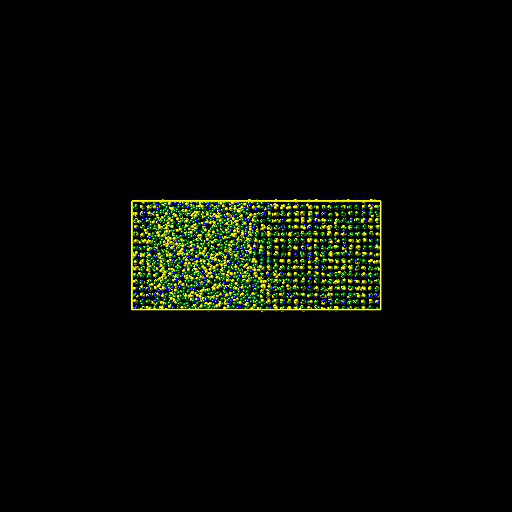

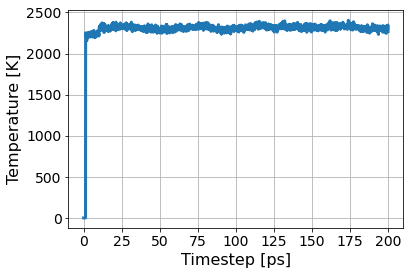

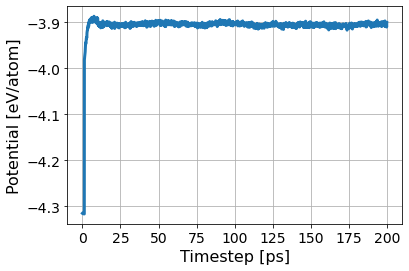

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




-------------------------------------------------------------
Experiment #  13
325
[0.1, 0.2, 0.0, 0.4, 0.3]
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/bc1832a8d08347178173f6db170db814/inputs.yaml
       RUNS/bc1832a8d08347178173f6db170db814
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/bc1832a8d08347178173f6db170db814/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:14<00:00, 185.39s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/bc1832a8d08347178173f6db170db814/inputs.yaml
       RUNS/bc1832a8d08347178173f6db170db814
Predicted melting temperature for this potential:  2500.9186666666665
95% confidence interval:  1.6467423632930775
Fraction of system solid:  0.0010850694444444445
Fraction of system liquid:  0.9913194444444444
Simulation Success Flag 0.0
Crystal Structure Info:  [5.000e+00 1.200e+01 1.000e+00 2.200e+01 0.000e+00 4.568e+03 4.608e+03]


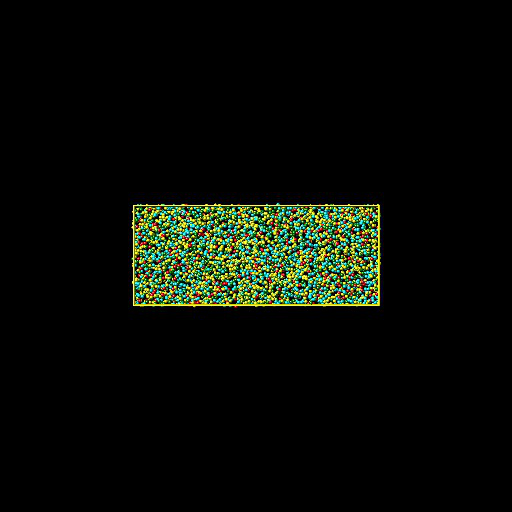

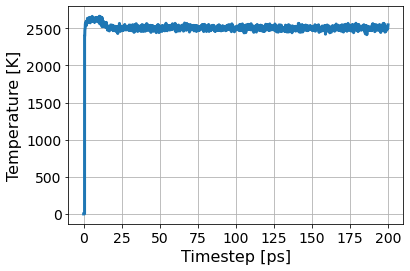

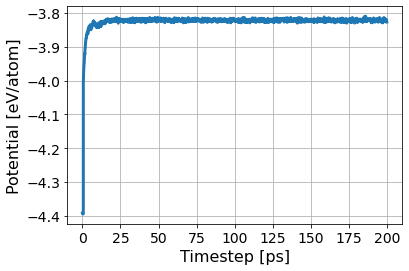

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/e4bcbaa2ec284fb08f4d9c57d6ff057b/inputs.yaml
       RUNS/e4bcbaa2ec284fb08f4d9c57d6ff057b
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/e4bcbaa2ec284fb08f4d9c57d6ff057b/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:17:24<00:00, 185.79s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/e4bcbaa2ec284fb08f4d9c57d6ff057b/inputs.yaml
       RUNS/e4bcbaa2ec284fb08f4d9c57d6ff057b
Predicted melting temperature for this potential:  2317.3031415730334
95% confidence interval:  1.5707992641085429
Fraction of system solid:  0.0010850694444444445
Fraction of system liquid:  0.9867621527777778
Simulation Success Flag 0.0
Crystal Structure Info:  [5.000e+00 2.800e+01 2.000e+00 2.600e+01 0.000e+00 4.547e+03 4.608e+03]


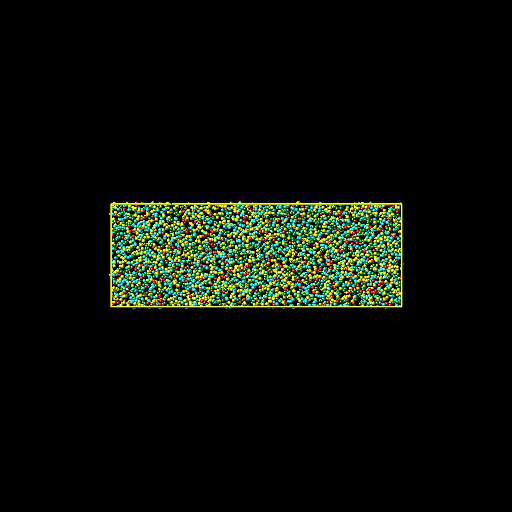

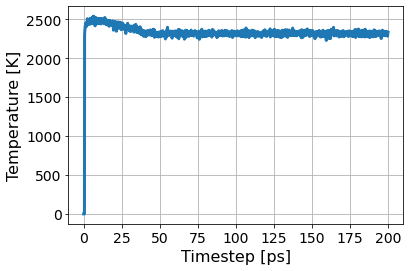

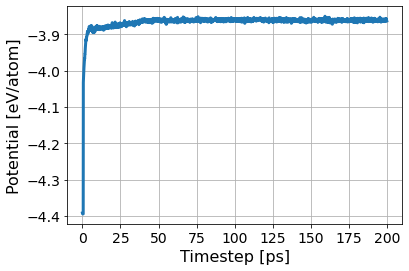

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/b2c26d5da8da471daebd2017f9c31159/inputs.yaml
       RUNS/b2c26d5da8da471daebd2017f9c31159
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/b2c26d5da8da471daebd2017f9c31159/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:18:14<00:00, 187.79s/cell]   


Saved output files: ['final.jpg']
simToolSaveErrorOccurred = 0
simToolAllOutputsSaved = 1
submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/b2c26d5da8da471daebd2017f9c31159/inputs.yaml
       RUNS/b2c26d5da8da471daebd2017f9c31159
Predicted melting temperature for this potential:  2375.583027340824
95% confidence interval:  2.0956524824542138
Fraction of system solid:  0.2628038194444444
Fraction of system liquid:  0.7217881944444444
Simulation Success Flag 0.0
Crystal Structure Info:  [1211.   46.   16.    9.    0. 3326. 4608.]


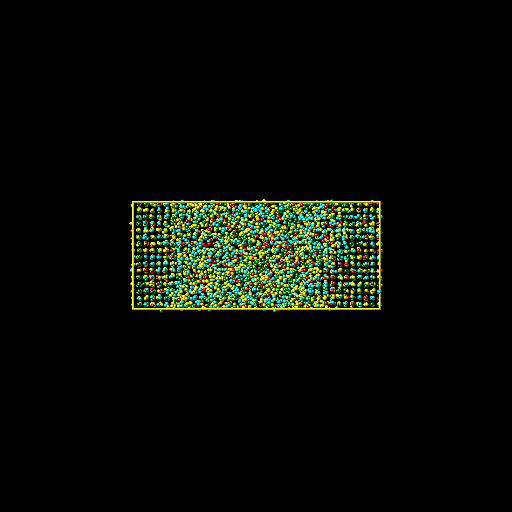

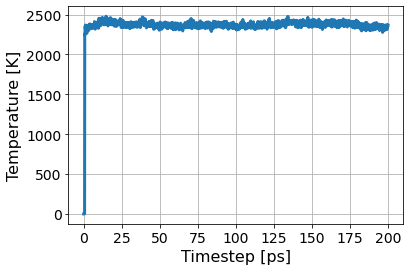

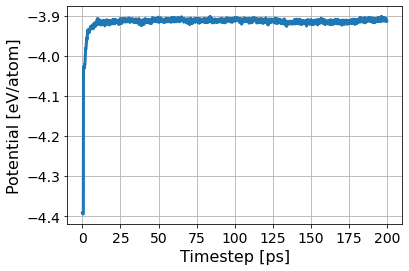

submit --local /apps/bin/ionhelperGetSimToolResult.sh meltheas r27
       RUNS/219ffd9b762040c0849498b3f3cb32b6/inputs.yaml
       RUNS/219ffd9b762040c0849498b3f3cb32b6
submit --local /apps/bin/ionhelperRunSimTool.sh meltheas r27
       RUNS/219ffd9b762040c0849498b3f3cb32b6/inputs.yaml


Input Notebook:  /apps/meltheas/r27/simtool/meltheas.ipynb
Output Notebook: meltheas.ipynb
Executing: 100%|??????????| 25/25 [1:20:27<00:00, 193.10s/cell]   


In [ ]:
n_steps = 40 #number of expirements
all_inds = set(range(len(y))) #set indexes
actaul_exp = np.sum(in_train)-len(initial_data)
gif_images = [] #list to save gifs as 2D array

history_train = [list(set(np.where(in_train)[0].tolist()))]
current_train_inds = []
#reset_comps = all_compositions.reset_index(drop=True)

#Create dataframe to save values to make into excel
saved_data = pd.DataFrame(columns=['IAF','Composition','Experiment',"Simulated Tm","Predicted Tm","Predicted Uncertainty","T_Solid","T_Liquid","Index"])
df2 = pd.DataFrame(columns = sample)

patience_counter = 0

print(len(history_train[-1]))

for i in range(n_steps):

    print("-------------------------------------------------------------")
    print("Experiment # ", i)
    
    current_train_inds = history_train[-1].copy()

    current_search_inds = list(all_inds.difference(current_train_inds))
    
    #Random Forest fitting and predicting
    model.fit(X[current_train_inds], y[current_train_inds]) #train model, with entry_number
    current_y_pred, current_y_std = model.predict(X[current_search_inds], return_std=True) #pred

    # ACQUISITION FUNCTIONS
    
    # EARLY STOPPING / ACQUISITION
    
    iaf = "MLI"
    
    if iaf == "MEI":
    
        index_of_prediction = np.argmax(current_y_pred)    # MEI   
        
        if np.max(current_y_pred) < np.max(y[current_train_inds]):
            patience_counter +=1
        else:
            patience_counter = 0
    
    elif iaf == "UCB":
        
        index_of_prediction = np.argmax([sum(x) for x in zip(current_y_pred, current_y_std)]) # UCB     
        
        if np.max([sum(x) for x in zip(current_y_pred, current_y_std)]) < np.max(y[current_train_inds]):
            patience_counter +=1
        else:
            patience_counter = 0        
    
    elif iaf == "MLI":
    
        index_of_prediction = np.argmax(np.divide(current_y_pred - np.max(y[current_train_inds]), current_y_std)) # MLI
    
        if np.max(current_y_pred) < np.max(y[current_train_inds]):
            patience_counter +=1
        else:
            patience_counter = 0
    
    
    elif iaf == "MU":
        
        index_of_prediction = np.argmax(current_y_std) # MU
        
        if np.max(current_y_std) < 50:
            patience_counter +=1
        else:
            patience_counter = 0
        
        
    else:
        index_of_prediction = np.random.choice(current_search_inds)           # Random    
    
#     if patience_counter > 15:
#         print("Early Stop")
#         break
        
    chosen_index_forsimul = current_search_inds[index_of_prediction]    
    composition_forsimul = all_compositions.iloc[chosen_index_forsimul] #compositions for simulation
    
    #printing index and compistion
    print(chosen_index_forsimul)
    print(list(composition_forsimul))

    # RUNNING MELTHEAS SIM

    # setting inputs
    sim_gif = []
    flag = False
    plus = 0.50
    minus = 0.25    
    iteration = 0
    
    T_ROM = current_y_pred[index_of_prediction]    
    
    while (flag == False):
        inputs = getSimToolInputs(MeltHEA)
        
        random_seed = int(np.random.randint(1,10000,1)[0])
        velocity_seed = int(np.random.randint(1,10000,1)[0])
        
        inputs.rand_seed.value = random_seed
        inputs.velocity_seed.value = velocity_seed
                
        inputs.time.value = 200000
        inputs.box_length.value = 18
        c1, c2, c3, c4, c5 = list(composition_forsimul)
        inputs.composition1.value = c1
        inputs.composition2.value = c2
        inputs.composition3.value = c3
        inputs.composition4.value = c4
        inputs.composition5.value = c5
        
        inputs.Tsolid.value = (T_ROM-(T_ROM*minus))
        inputs.Tliquid.value = (T_ROM+(T_ROM*plus))

        # running and outputs 
        r = Run(MeltHEA, inputs)

        melting_temperature_obtained = r.read('melting_temperature')
        flag = r.read('successful')
        fraction_solid = r.read('fraction_solid')
        fraction_liquid = r.read('fraction_liquid')
        sim_gif.append(r.read('final_snapshot'))

        print ("Predicted melting temperature for this potential: ", (r.read('melting_temperature')))
        print ("95% confidence interval: ", (r.read('melting_temperature_ci')))
        print ("Fraction of system solid: ", (r.read('fraction_solid')))
        print ("Fraction of system liquid: ", (r.read('fraction_liquid')))
        print ("Simulation Success Flag", (r.read('successful')))
        print ('Crystal Structure Info: ', r.read('counts_array'))
        display(r.read('final_snapshot'))

        if (flag == False):
            if fraction_solid >= fraction_liquid:
                T_ROM += T_ROM*.05 #~80
            elif fraction_liquid >= fraction_solid:
                T_ROM -= T_ROM*.05 #~80
                
         #Graph from the melting workflow
        import matplotlib.pyplot as plt
        #Total number of atoms for 8x8 BCC unit cell cross-section and user input box-length
        if inputs.crystal_structure.value == 'bcc':
            atom_count = 8*8*2*inputs.box_length.value

        #Total number of atoms for 8x8 FCC unit cell cross-section and user input box-length
        elif inputs.crystal_structure.value == 'fcc':
            atom_count = 8*8*4*inputs.box_length.value

        ts = r.read('time_series')

        temperature = r.read('temperature_series')
        plt.plot((ts/1000),temperature,linewidth=3)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel('Timestep [ps]',fontsize=16)
        plt.ylabel('Temperature [K]',fontsize=16)
        plt.grid()
        plt.show()

        potential_energy = r.read('potential_energy_series')
        plt.plot((ts/1000),np.divide(potential_energy,atom_count),linewidth=3)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel('Timestep [ps]',fontsize=16)
        plt.ylabel('Potential [eV/atom]',fontsize=16)
        plt.grid()
        plt.show() 

    y[chosen_index_forsimul] = melting_temperature_obtained
    
    #Ending when desired temp found
    if melting_temperature_obtained > 2600:
        continue

    current_train_inds.append(chosen_index_forsimul) #from inputs choosing untrained indexes randomly
    history_train.append(current_train_inds) #storage list, of sets of values created throughout sequential learning
    
    composition_string = " ".join([i + ' ' + str(j) for i, j in zip(["Cr","Co","Cu","Fe","Ni"], composition_forsimul)])
    
    T_Solid = inputs.Tsolid.value
    T_Liquid = inputs.Tliquid.value
    
    
    #Creating dataframe for Animation
    data = pd.DataFrame([iaf,composition_string, actaul_exp, melting_temperature_obtained, current_y_pred[index_of_prediction],
                         current_y_std[index_of_prediction], T_Solid, T_Liquid,chosen_index_forsimul, random_seed, velocity_seed])
    data = data.T
    data = data.rename(columns = {0:'IAF', 1:'Composition',2:'Experiment',3: "Simulated Tm",4: "Predicted Tm",5:"Predicted Uncertainty",6:"T_Solid",7:"T_Liquid",8:"Index", 9:"RandomSeed", 10:"VelocitySeed"})
    saved_data = saved_data.append(data)
    actaul_exp = actaul_exp + 1
    
    #Saving Information into file
    files_to_saved_data = saved_data
    if list_seq_learn:
        files_to_saved_data = saved_data.append(seq_learn_data)
    files_to_saved_data = files_to_saved_data.sort_values(by='Experiment')
    
    csv_file_name2 = '{0}_melting_8labels200pico{1}.csv'.format(iaf,len(list_seq_learn))
    files_to_saved_data.to_csv(csv_file_name2, index = False)
    
    #Getting Images for Gif
    gif_images.append(sim_gif)
    

In [ ]:
display(saved_data)

Exception in thread IPythonHistorySavingThread:
Traceback (most recent call last):
  File "/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/IPython/core/history.py", line 780, in writeout_cache
    self._writeout_input_cache(conn)
  File "/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/IPython/core/history.py", line 764, in _writeout_input_cache
    (self.session_number,)+line)
sqlite3.IntegrityError: UNIQUE constraint failed: history.session, history.line

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/IPython/core/history.py", line 834, in run
    self.history_manager.writeout_cache(self.db)
  File "</apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/decorator.py:decorator-gen-23>", line 2, in writeout_cache
  File "/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/IPyth

# Save Runs Into CSV

In [ ]:
if list_seq_learn:
    saved_data = saved_data.append(seq_learn_data)
saved_data = saved_data.sort_values(by='Experiment')
display(saved_data)

In [ ]:
csv_file_name2 = '{0}_melting_8labels200pico{1}.csv'.format(iaf,len(list_seq_learn))
saved_data.to_csv(csv_file_name2, index = False)